In [26]:
import os

In [27]:
import xarray as xr
import numpy as np
import pandas as pd

In [28]:
import matplotlib.pyplot as plt

import FaIR data

In [29]:
ds_fair=xr.open_dataset('SCM_data/timeseries/flat10_FaIR.nc')

import MAGICC data

In [30]:
ds_magicc=xr.open_dataset('SCM_data/timeseries/flat10_magicc.nc')

In [31]:
ds_cicero=xr.open_dataset('SCM_data/timeseries/flat10_CICEROSCM.nc')

In [32]:
ds_magicc=ds_magicc.rename_vars(name_dict={'Atmospheric_Concentrations__CO2':'co2_concentration'})
ds_magicc=ds_magicc.rename_vars(name_dict={'Surface_Air_Temperature_Change':'temperature'})
ds_magicc=ds_magicc.rename_dims(dims_dict={'ensemble_member':'config'})

ds_magicc["scenario"]=("scenario",['esm-flat10','esm-flat10_cdr','esm-flat10_zec'])
ds_cicero["scenario"]=("scenario",['esm-flat10','esm-flat10_zec','esm-flat10_cdr','esm-piControl'])

In [33]:
ds_magicc

<xarray.Dataset>
Dimensions:            (time: 316, scenario: 3, config: 600)
Coordinates:
  * time               (time) datetime64[ns] 1850-01-01 ... 2165-01-01
  * scenario           (scenario) <U14 'esm-flat10' ... 'esm-flat10_zec'
  * ensemble_member    (config) object '0' '1' '10' '100' ... '97' '98' '99'
Dimensions without coordinates: config
Data variables:
    co2_concentration  (scenario, config, time) float64 ...
    temperature        (scenario, config, time) float64 ...
Attributes:
    scmdata_metadata_climate_model:  MAGICCv7.5.3
    scmdata_metadata_region:         World
    scmdata_metadata_model:          idealised
    created_at:                      2023-10-24T13:45:25.348212
    _scmdata_version:                0.16.1

In [34]:
e_flat10=pd.read_csv('flat10.csv',header=4)
e_flat10_cdr=pd.read_csv('flat10_cdr.csv',header=4)
e_flat10_zec=pd.read_csv('flat10_zec.csv',header=4)


In [35]:
e_flat10

Time (years)  Emission Rate (PgC a-1)
0             0.5                     10.0
1             1.5                     10.0
2             2.5                     10.0
3             3.5                     10.0
4             4.5                     10.0
..            ...                      ...
145         145.5                     10.0
146         146.5                     10.0
147         147.5                     10.0
148         148.5                     10.0
149         149.5                     10.0

[150 rows x 2 columns]

In [36]:
def plot_bxp(SampleData,tim,j,ax1,col='steelblue',prctl=[5,25,50,75,95],linestyle='-',alpha=0.2,lbl=''):
    SDist=np.percentile(SampleData,prctl,axis=1).T
    for i in range(int(np.floor(len(prctl)/2))+1):
        ax1.vlines(tim,SDist[j,0+i], SDist[j,len(prctl)-1-i], color=col,linestyle=linestyle)
    
    ax1.plot(tim,SDist[j,int(np.floor(len(prctl)/2))], color=col, marker='o',label=lbl)

In [37]:
def plot_range(SampleData,ax1,col='steelblue',prctl=[5,25,50,75,95]):
 
 SDist=np.percentile(SampleData,prctl,axis=1).T

 x=np.arange(0,len(pd.DatetimeIndex(SampleData.time).year))
 #ax1.plot(x, SDist[:,2],)
 for i in range(int(np.floor(len(prctl)/2))+1):
     alph=0.15+(i/len(prctl))
     ax1.fill_between(x,SDist[:,0+i], SDist[:,len(prctl)-1-i], color=col, alpha=alph)
 return SDist

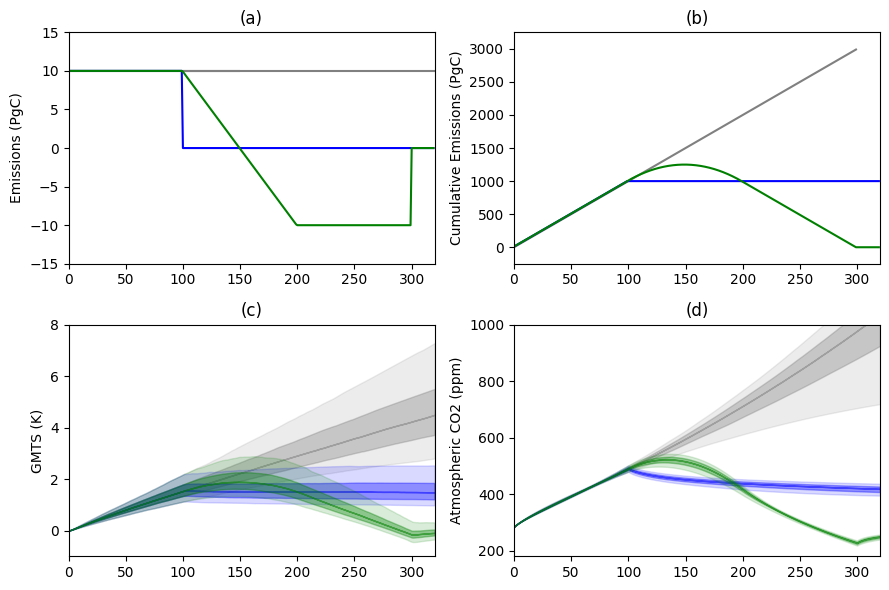

In [38]:
fig = plt.figure(figsize=[9,6])


ax1 = fig.add_subplot(2,2,1)

ax1.plot(e_flat10['Emission Rate (PgC a-1)'],color='grey')
ax1.axhline(e_flat10['Emission Rate (PgC a-1)'][0],color='grey')

ax1.plot(e_flat10_zec['Emission Rate (PgC a-1)'],color='blue')
ax1.plot(e_flat10_cdr['Emission Rate (PgC a-1)'],color='green')
ax1.set_title('(a)')
ax1.set_ylabel('Emissions (PgC)')
ax1.set_ylim([-15,15])
ax1.set_xlim([0,320])

ax3 = fig.add_subplot(2,2,2)

ax3.plot(np.arange(0,300)*10,color='grey')
ax3.plot(np.cumsum(e_flat10_zec['Emission Rate (PgC a-1)']),color='blue')
ax3.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)']),color='green')
ax3.set_title('(b)')
ax3.set_ylabel('Cumulative Emissions (PgC)')
ax3.set_ylim([-250,3250])
ax3.set_xlim([0,320])



ax2 = fig.add_subplot(2,2,3)

plot_range(ds_fair.temperature.sel(scenario='esm-flat10'),ax2,col='grey')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec'),ax2,col='blue')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr'),ax2,col='green')
ax2.set_ylabel('GMTS (K)')
ax2.set_ylim([-1,8])
ax2.set_title('(c)')

ax2.set_xlim([0,320])

ax5= fig.add_subplot(2,2,4)

plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10'),ax5,col='grey')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_zec'),ax5,col='blue')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_cdr'),ax5,col='green')
ax5.set_ylabel('Atmospheric CO2 (ppm)')
ax5.set_title('(d)')

ax5.set_ylim([180,1000])
ax5.set_xlim([0,320])

plt.tight_layout()




(0.0, 320.0)

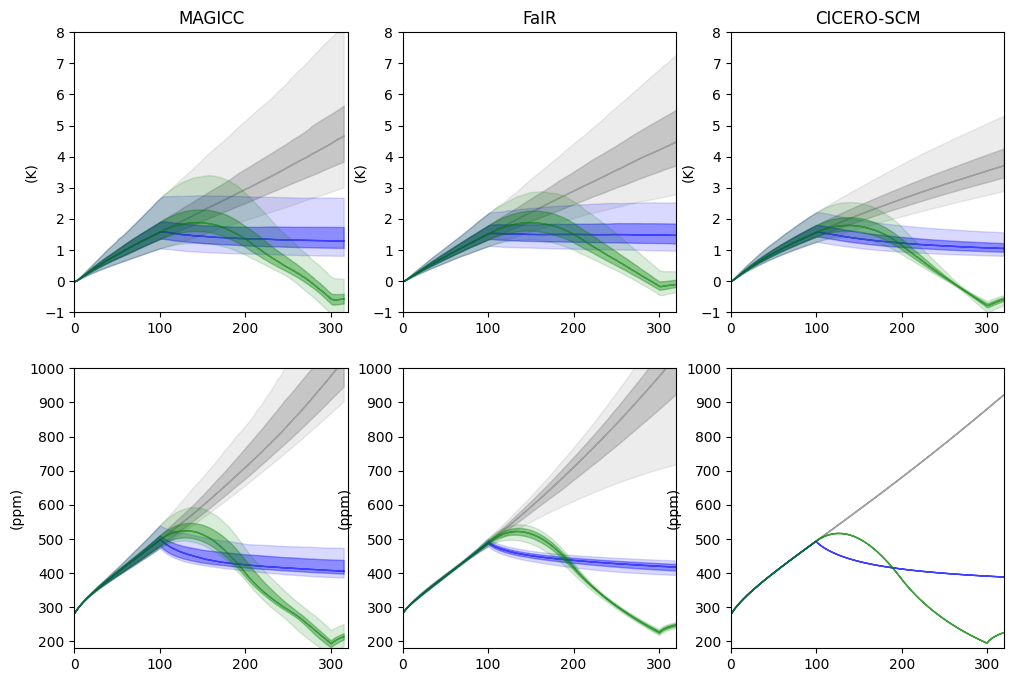

In [39]:
fig = plt.figure(figsize=[12,8])

ax1 = fig.add_subplot(2,3,1)

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10').T,ax1,col='grey')
plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_zec').T,ax1,col='blue')
plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').T,ax1,col='green')
ax1.set_title('MAGICC')
ax1.set_ylabel('(K)')
ax1.set_ylim([-1,8])
ax1.set_xlim([0,320])


ax2 = fig.add_subplot(2,3,2)

plot_range(ds_fair.temperature.sel(scenario='esm-flat10'),ax2,col='grey')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec'),ax2,col='blue')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr'),ax2,col='green')
ax2.set_title('FaIR')
ax2.set_ylabel('(K)')
ax2.set_ylim([-1,8])
ax2.set_xlim([0,320])

ax3 = fig.add_subplot(2,3,3)

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10'),ax3,col='grey')
plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_zec'),ax3,col='blue')
plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_cdr'),ax3,col='green')
ax3.set_title('CICERO-SCM')
ax3.set_ylabel('(K)')
ax3.set_ylim([-1,8])
ax3.set_xlim([0,320])

ax4 = fig.add_subplot(2,3,4)

plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10').T,ax4,col='grey')
plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10_zec').T,ax4,col='blue')
plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10_cdr').T,ax4,col='green')
ax4.set_ylabel('(ppm)')
ax4.set_ylim([180,1000])
ax4.set_xlim([0,320])

ax5= fig.add_subplot(2,3,5)

plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10'),ax5,col='grey')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_zec'),ax5,col='blue')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_cdr'),ax5,col='green')
ax5.set_ylabel('(ppm)')
ax5.set_ylim([180,1000])
ax5.set_xlim([0,320])

ax6 = fig.add_subplot(2,3,6)

plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10'),ax6,col='grey')
plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10_zec'),ax6,col='blue')
plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10_cdr'),ax6,col='green')
ax6.set_ylabel('(ppm)')
ax6.set_ylim([180,1000])
ax6.set_xlim([0,320])




In [40]:
def extd(ts,leng):
    out=np.zeros(leng)
    if leng>len(ts):
        out[:len(ts)]=ts.values
        out[len(ts):]=ts.iloc[-1]
    else:
        out=ts[:leng]
    return out

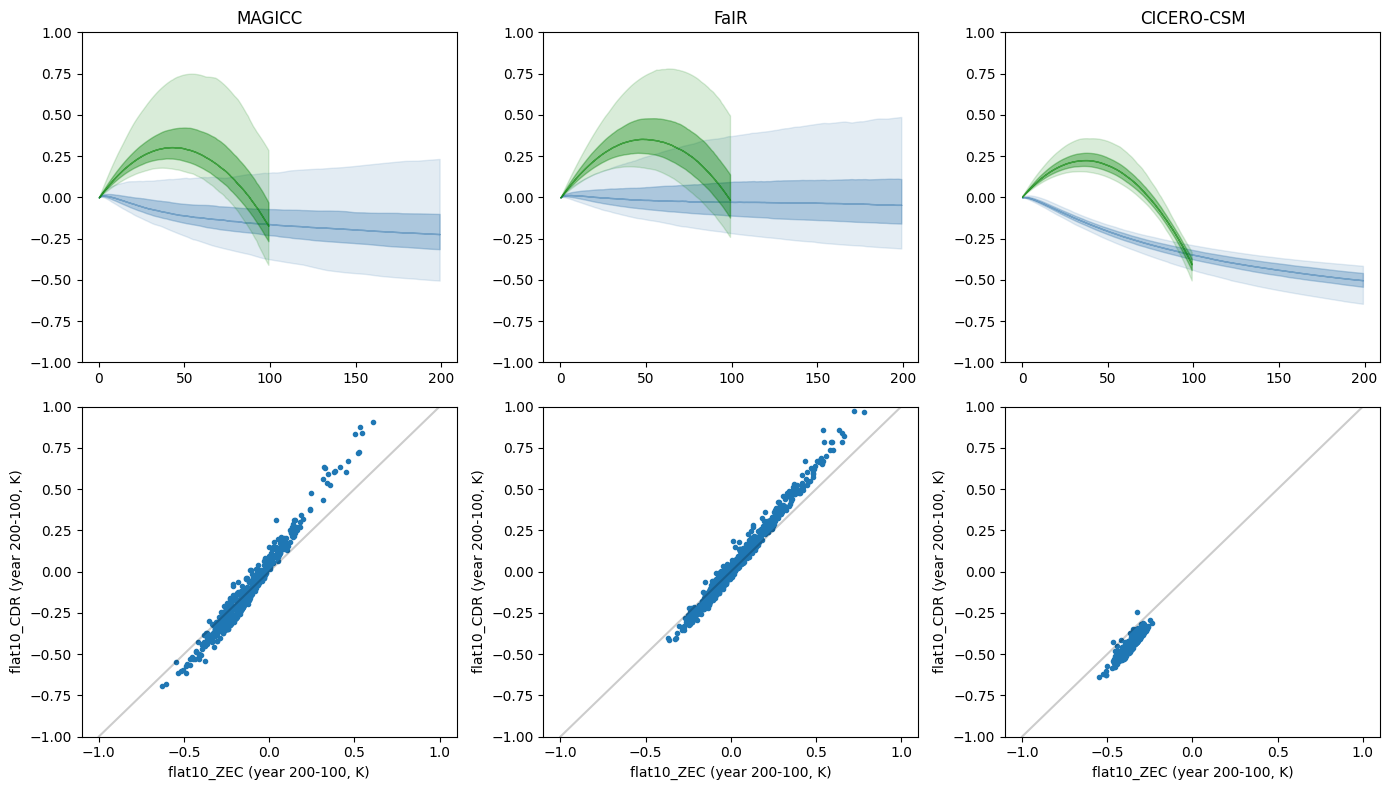

In [41]:
fig = plt.figure(figsize=[14,8])

m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100).T
m_100pl=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T
m_100plc=ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200)).T

ax1 = fig.add_subplot(2,3,1)
ax1.set_ylim([-1,1])
ax1.set_title('MAGICC')
plot_range(m_100pl-m_100,ax1)
plot_range(m_100plc-m_100,ax1,'g')

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
t_100pl=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
t_100plc=ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,2)
ax2.set_ylim([-1,1])
ax2.set_title('FaIR')

plot_range(t_100pl-t_100,ax2)
plot_range(t_100plc-t_100,ax2,'g')

c_100=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
c_100pl=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
c_100plc=ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,3)
ax2.set_ylim([-1,1])
ax2.set_title('CICERO-CSM')

plot_range(c_100pl-c_100,ax2)
plot_range(c_100plc-c_100,ax2,'g')

ax3 = fig.add_subplot(2,3,4)

ax3.plot(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-m_100,ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-m_100,'.')
ax3.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax3.set_xlabel('flat10_ZEC (year 200-100, K)')
ax3.set_ylabel('flat10_CDR (year 200-100, K)')
ax3.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,5)

ax4.plot(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-t_100,ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-t_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,6)

ax4.plot(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-c_100,ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-c_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])
plt.tight_layout()

In [42]:
max_co2 = ds_fair.time.where(ds_fair.co2_concentration > 284.3*2).min(dim="time")
tcr_flat10_fair=ds_fair.sel(time=max_co2.fillna(0).astype(int)).where(max_co2.notnull()).temperature.values[0,:]

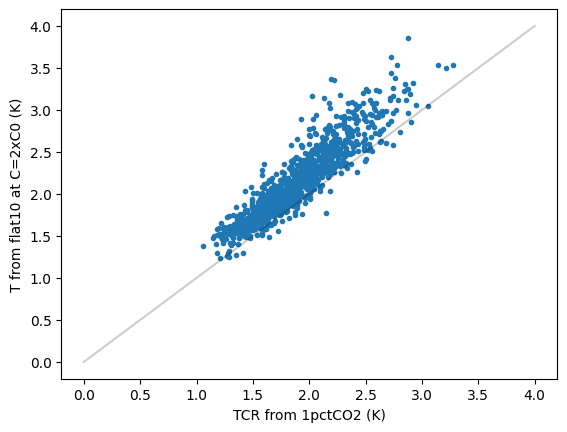

In [43]:
plt.plot(ds_fair['tcr'],tcr_flat10_fair,'.')
plt.xlabel('TCR from 1pctCO2 (K)')
plt.ylabel('T from flat10 at C=2xC0 (K)')
plt.plot([0,4],[0,4],'k-',alpha=0.2)


In [44]:
mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','CNRM-ESM2-1','MPI-ESM1-2-LR']
expt=['esm-pictrl','1pctco2','flat10','flat10-zec','flat10-cdr']
flds=['tas','co2','nbp','fgco2']

#ESM analysis

In [119]:
ed={}
for m in mdls:
    ed[m]={}
    for e in expt:
        tmpa=[]
        for f in flds:

                fl10='ESM_data/'+m+'/'+'flat10'+'_'+f+'_'+m+'.nc'

                fl='ESM_data/'+m+'/'+e+'_'+f+'_'+m+'.nc'

                if os.path.exists(fl) and os.path.exists(fl10):
                    otmp=xr.open_dataset(fl)
                    otmp10=xr.open_dataset(fl10)
                    if 'nep' in list(otmp.keys()):
                        otmp=otmp.rename_vars({"nep": "nbp"})
                    if 'nep' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"nep": "nbp"})
                    if 'CO2_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"CO2_GLOB": "co2"})
                        otmp=otmp.rename_vars({"CO2_GLOB": "co2"})
                    if 'NBP_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"NBP_GLOB": "nbp"})
                        otmp=otmp.rename_vars({"NBP_GLOB": "nbp"})
                    if 'FGCO2_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"FGCO2_GLOB": "fgco2"})
                        otmp=otmp.rename_vars({"FGCO2_GLOB": "fgco2"})    
                    if 'TIME' in list(otmp10.coords.keys()):                  
                        otmp10=otmp10.swap_dims({"TIME": "time"}).rename_vars({"TIME": "time"})
                    if 'TIME' in list(otmp.coords.keys()):                  
                        otmp=otmp.swap_dims({"TIME": "time"}).rename_vars({"TIME": "time"})
                    if 'TAS_GLOB' in list(otmp10.keys()):                  
                        otmp10=otmp10.rename_vars({"TAS_GLOB": "tas"})
                    if 'TAS_GLOB' in list(otmp.keys()):                  
                        otmp=otmp.rename_vars({"TAS_GLOB": "tas"})
                    if '__xarray_dataarray_variable__' in list(otmp10.keys()):                  
                        otmp10=otmp10.rename_vars({"__xarray_dataarray_variable__": f})
                    if '__xarray_dataarray_variable__' in list(otmp.keys()):                  
                        otmp=otmp.rename_vars({"__xarray_dataarray_variable__": f})


                        

                        
                                        
                                               
                    tmp=otmp.copy(deep=True)
                    tmp10=otmp10.copy(deep=True)

                    if e=='flat10':
                        if len(tmp.time)<1000:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='M')
                        tmp=tmp[f]    
                    else: 
                        if len(tmp.time)<1000:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='Y')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='M')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='M')
  
                        tmp=xr.concat((tmp10.where(tmp10['time.year'] < 1800, drop=True)[f],tmp[f]),'time')
                    tmp=tmp.groupby('time.year').mean()
                    if len(tmp.shape)==3:
                        tmp=tmp.sel(lat=0).sel(lon=0).drop('lat').drop('lon')
                    if len(tmp.shape)==4:
                        if 'lev' in list(otmp10.coords.keys()):
                            tmp=tmp.sel(lat=0).sel(lon=0).isel(lev=[0]).drop('lat').drop('lon').drop('lev')
                        else:
                            tmp=tmp.sel(lat=0).sel(lon=0).isel(plev=[0]).drop('lat').drop('lon').drop('plev')
                    
                    if tmp.name=='tas':            
                        t10=tmp[0:20].mean().values
                        d10=tmp[20:40].mean().values-t10
                        t0=t10-d10/2
                        tmp=tmp-t0
                    tmpa.append(tmp)

                else:
                    print(m+e+f)
        
             
        ed[m][e]=xr.merge(tmpa)
        if len(tmpa)>0:
            ed[m][e]['fco2fos']=ed[m][e]['tas'].copy()
            if e=='flat10':
                    ed[m][e]['fco2fos'].values=extd(e_flat10['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-cdr':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-zec':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_zec['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if m=='ACCESS-ESM1-5':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6

            if m=='GFDL-ESM4':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                aco2=np.diff(ed[m][e]['co2'][:,0],prepend=ed[m][e]['co2'][0])*2.12
                ed[m][e]['fgco2']=ed[m][e]['fco2fos']-aco2-ed[m][e]['nbp']              
            if m=='CESM2':
                ed[m][e]['fgco2']=ed[m][e]['fgco2']/1e15
                ed[m][e]['nbp']=ed[m][e]['nbp']/1e15
                
                ed[m][e]['co2']=280+np.cumsum(ed[m][e]['fco2fos']-ed[m][e]['fgco2']-ed[m][e]['nbp'])/2.12
            if m=='NorESM2-LM':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                ed[m][e]['fgco2']=ed[m][e]['fgco2']*5.1e14/1e12*3600*24*365*.71

            if m=='CNRM-ESM2-1':
                ed[m][e]['nbp']=ed[m][e]['nbp']/1e2
                                
for i,m in enumerate(mdls):
    print(m)
    try:
        ed[m]['flat10-cdr']['C_atm']=(ed[m]['flat10-cdr']['co2']-ed[m]['flat10']['co2'][0])*2.13
    except:
        print('fail cdr')
    try:
        ed[m]['flat10-zec']['C_atm']=(ed[m]['flat10-zec']['co2']-ed[m]['flat10']['co2'][0])*2.13
    except:
        print('fail zec')
    try:
        ed[m]['flat10']['C_atm']=(ed[m]['flat10']['co2']-ed[m]['flat10']['co2'][0])*2.13

    except:
        print('fail flat')
                        

ACCESS-ESM1-5esm-pictrltas
ACCESS-ESM1-5esm-pictrlco2
ACCESS-ESM1-5esm-pictrlnbp
ACCESS-ESM1-5esm-pictrlfgco2
ACCESS-ESM1-51pctco2tas
ACCESS-ESM1-51pctco2co2
ACCESS-ESM1-51pctco2nbp
ACCESS-ESM1-51pctco2fgco2


/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/sanderson/pyenv/ciceroscm/lib/pytho

CESM2esm-pictrltas
CESM2esm-pictrlco2
CESM2esm-pictrlnbp
CESM2esm-pictrlfgco2
CESM21pctco2tas
CESM21pctco2co2
CESM21pctco2nbp
CESM21pctco2fgco2
CESM2flat10co2
CESM2flat10-zecco2
CESM2flat10-cdrco2
GFDL-ESM4esm-pictrltas
GFDL-ESM4esm-pictrlco2
GFDL-ESM4esm-pictrlnbp
GFDL-ESM4esm-pictrlfgco2
GFDL-ESM41pctco2tas
GFDL-ESM41pctco2co2
GFDL-ESM41pctco2nbp
GFDL-ESM41pctco2fgco2
GFDL-ESM4flat10fgco2
GFDL-ESM4flat10-zecfgco2
GFDL-ESM4flat10-cdrfgco2
NorESM2-LM1pctco2tas
NorESM2-LM1pctco2co2
NorESM2-LM1pctco2nbp
NorESM2-LM1pctco2fgco2
CNRM-ESM2-1esm-pictrltas
CNRM-ESM2-1esm-pictrlco2
CNRM-ESM2-1esm-pictrlnbp
CNRM-ESM2-1esm-pictrlfgco2
CNRM-ESM2-11pctco2tas
CNRM-ESM2-11pctco2co2
CNRM-ESM2-11pctco2nbp
CNRM-ESM2-11pctco2fgco2
CNRM-ESM2-1flat10-zectas
CNRM-ESM2-1flat10-zecco2
CNRM-ESM2-1flat10-zecnbp
CNRM-ESM2-1flat10-zecfgco2
CNRM-ESM2-1flat10-cdrtas
CNRM-ESM2-1flat10-cdrco2
CNRM-ESM2-1flat10-cdrnbp
CNRM-ESM2-1flat10-cdrfgco2
MPI-ESM1-2-LResm-pictrltas
MPI-ESM1-2-LResm-pictrlco2
MPI-ESM1-2-LResm-pic

/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/Users/sanderson/pyenv/ciceroscm/lib/pytho

ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
CNRM-ESM2-1
fail cdr
fail zec
MPI-ESM1-2-LR


/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/Users/sanderson/pyenv/ciceroscm/lib/pytho

ACCESS-ESM1-5
ACCESS-ESM1-5
ACCESS-ESM1-5
CESM2
CESM2
CESM2
GFDL-ESM4
GFDL-ESM4
GFDL-ESM4
GISS
GISS
GISS
NorESM2-LM
NorESM2-LM
NorESM2-LM
CNRM-ESM2-1
CNRM-ESM2-1
CNRM-ESM2-1
MPI-ESM1-2-LR
MPI-ESM1-2-LR
MPI-ESM1-2-LR


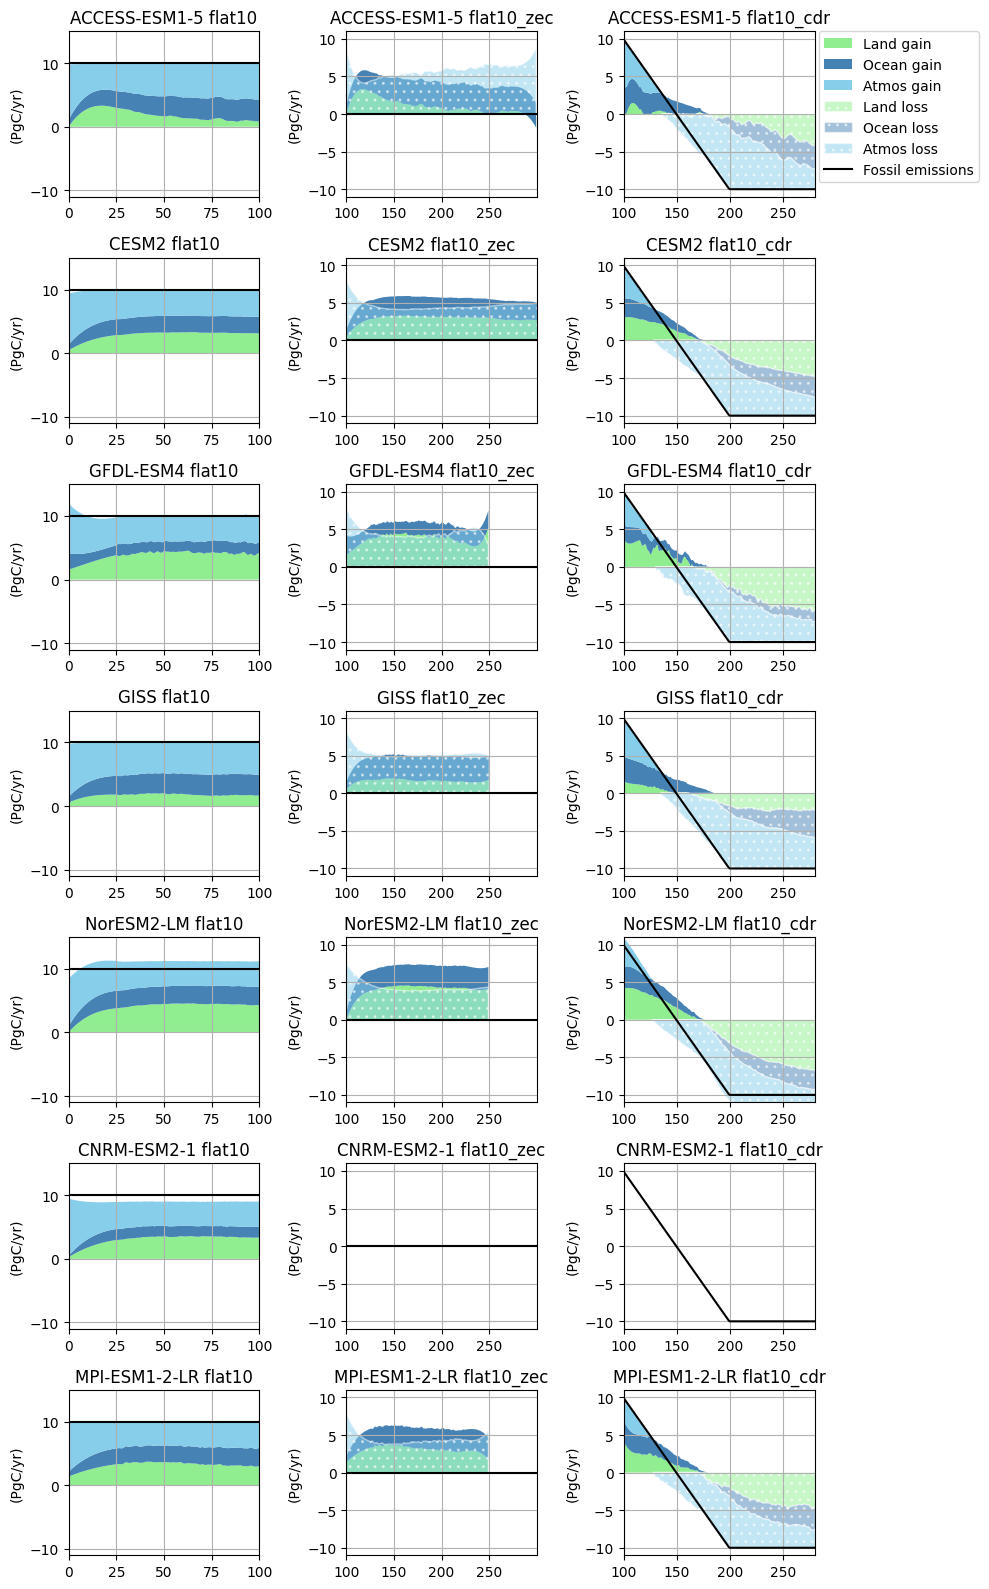

In [121]:
fig, axs = plt.subplots(7, 3,figsize=[10,16])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    
    tmpa=ed[m]['flat10']['C_atm'].diff('year').pad(year=(0,1),constant_values=0).copy()
    tmpa[-1]=tmpa[-2]
    tmpl=ed[m]['flat10']['nbp'].copy()
    tmpo=ed[m]['flat10']['fgco2'].copy()


    stmpa = savgol_filter(tmpa.squeeze(drop=True), 51, 3) 
    stmpl = savgol_filter(tmpl.squeeze(drop=True), 51, 3) 
    stmpo = savgol_filter(tmpo.squeeze(drop=True), 51, 3) 

    axs[3*i].stackplot(np.arange(0,len(tmpa)),stmpl,stmpo,stmpa,colors=['lightgreen','steelblue','skyblue',])

    axs[3*i].set_title(m+' flat10')
    axs[3*i].set_ylabel(r'(PgC/yr)')    
    axs[3*i].set_xlim([0,100])
    axs[3*i].set_ylim([-11,15])
    axs[3*i].grid()
    axs[3*i].plot(e_flat10['Emission Rate (PgC a-1)'][:100].values,'k')

    print(m)
    try:
        tmpa=ed[m]['flat10-zec']['C_atm'].diff('year').pad(year=(0,1)).copy()
        tmpa[-1]=tmpa[-2]
        tmpl=ed[m]['flat10-zec']['nbp'].copy()
        tmpo=ed[m]['flat10-zec']['fgco2'].copy()
    

        axs[3*i+1].stackplot(np.arange(0,len(stmpa)),stmpl,stmpo,colors=['lightgreen','steelblue','skyblue'])
        ppp=axs[3*i+1].stackplot(np.arange(0,len(stmpa)),stmpa,colors=['skyblue'])
        ppp[0].set_hatch("..")
        ppp[0].set_alpha(0.5)
        ppp[0].set_edgecolor('w')
        

    except:
        0
    axs[3*i+1].set_title(m+' flat10_zec')
    axs[3*i+1].set_ylabel(r'(PgC/yr)')    
    axs[3*i+1].set_xlim([0,200])
    axs[3*i+1].grid() 
    axs[3*i+1].set_ylim([-11,11])
    axs[3*i+1].plot(e_flat10_zec['Emission Rate (PgC a-1)'][100:].values,'k')
    axs[3*i+1].set_xticks([0,50,100,150])
    axs[3*i+1].set_xticklabels([100,150,200,250])
    
         
    print(m)
    try:
        tmpa=ed[m]['flat10-cdr']['C_atm'].diff('year').pad(year=(0,1)).copy()
        tmpa[-1]=tmpa[-2]
        tmpl=ed[m]['flat10-cdr']['nbp'].copy()
        tmpo=ed[m]['flat10-cdr']['fgco2'].copy()
        if m=='NorESM2-LM':
            tmpa[16]=tmpa[15]
            tmpa[17]=tmpa[18]
        #    tmpo[:17]=10-tmpl[:17]-tmpa[:17]
        stmpa = savgol_filter(tmpa[100:].squeeze(drop=True), 31, 3) 
        stmpl = savgol_filter(tmpl[100:].squeeze(drop=True), 31, 3) 
        stmpo = savgol_filter(tmpo[100:].squeeze(drop=True), 31, 3) 
        
        stmpa_neg=np.clip(stmpa,-1e10,0)
        stmpa_pos=np.clip(stmpa,0,1e10)
        stmpo_neg=np.clip(stmpo,-1e10,0)
        stmpo_pos=np.clip(stmpo,0,1e10)
        stmpl_neg=np.clip(stmpl,-1e10,0)
        stmpl_pos=np.clip(stmpl,0,1e10)
        crs1=np.argmin(stmpa_pos>0)
        crs2=np.argmin(stmpl_pos>0)
        
        axs[3*i+2].stackplot(np.arange(0,len(stmpa)),stmpl_pos[:],stmpo_pos[:],stmpa_pos[:],colors=['lightgreen','steelblue','skyblue'],labels=['Land gain','Ocean gain','Atmos gain'])

        pp3=axs[3*i+2].stackplot(np.arange(crs1,len(stmpa)),stmpl_neg[crs1:],stmpo_neg[crs1:],stmpa_neg[crs1:],colors=['lightgreen','steelblue','skyblue'],labels=['Land loss','Ocean loss','Atmos loss'])
        for pp in pp3:
            pp.set_hatch("..")  
            pp.set_edgecolor('w')  
            pp.set_alpha(0.5)
        
    except:
        0
    axs[3*i+2].set_title(m+' flat10_cdr')
    axs[3*i+2].set_ylabel(r'(PgC/yr)')    
    axs[3*i+2].set_xlim([0,180])
    axs[3*i+2].grid() 
    axs[3*i+2].set_ylim([-11,11])
    axs[3*i+2].set_xticks([0,50,100,150])
    axs[3*i+2].set_xticklabels([100,150,200,250])
    
    axs[3*i+2].plot(e_flat10_cdr['Emission Rate (PgC a-1)'][100:].values,'k',label='Fossil emissions')
    if i==0:
        l=axs[3*i+2].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()



In [113]:
tmp10

/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:    (time: 150, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time       (time) datetime64[ns] 1700-12-31 1701-12-31 ... 1849-12-31
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
    depth      float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    fgco2      (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 2.2.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 MPI-ESM1.2-LR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology, Hamburg 201...
    activity_id:            C4MIP
    branch_method:          standard
    ...                     ...
    variant_info:           Emission driven. Branched from emission driven es...
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/60316986-1a48-4bf7-9669-916e3937a4c2
    CDO:                    Climate Data Operators version 2.2.2 (https://mpi...

ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
CNRM-ESM2-1
fail cdr
fail zec
MPI-ESM1-2-LR


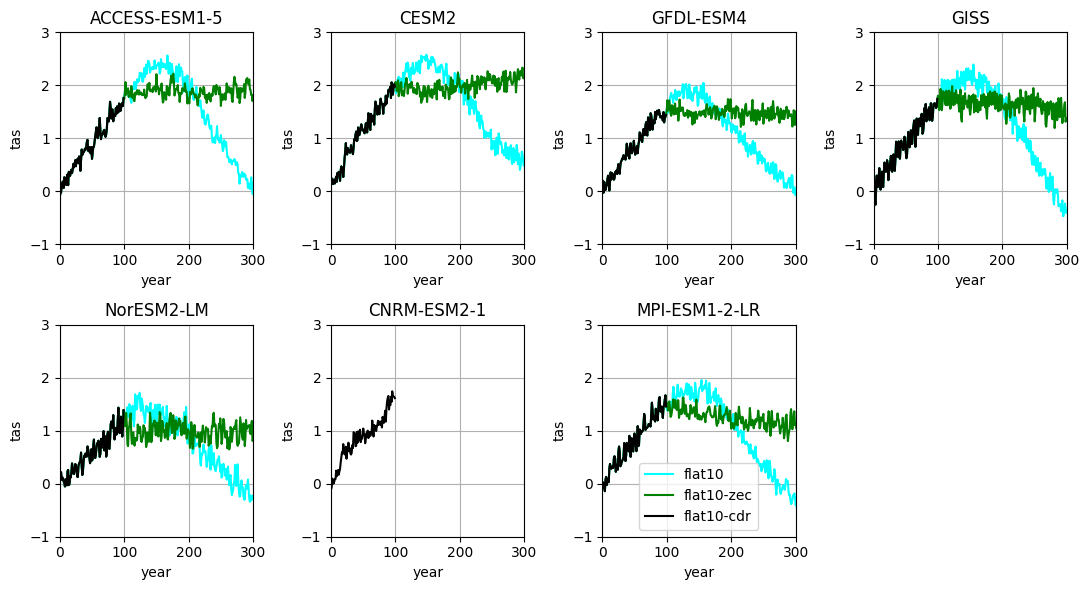

In [106]:
fig, axs = plt.subplots(2, 4,figsize=[11,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    try:
        (ed[m]['flat10-cdr']['tas']).plot(color='cyan',ax=axs[i],label='flat10')
    except:
        print('fail cdr')
    try:
        (ed[m]['flat10-zec']['tas']).plot(color='green',ax=axs[i],label='flat10-zec')
    except:
        print('fail zec')
    (ed[m]['flat10']['tas'][:100]).plot(color='k',ax=axs[i],label='flat10-cdr')

    axs[i].set_title(m)
    axs[i].set_ylim([-1,3])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1900,2000])
    axs[i].set_xticklabels([0,100,200,300])
    axs[i].grid()
axs[7].set_axis_off()
plt.tight_layout()
axs[6].legend()
    


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
CNRM-ESM2-1
fail cdr
fail zec
MPI-ESM1-2-LR


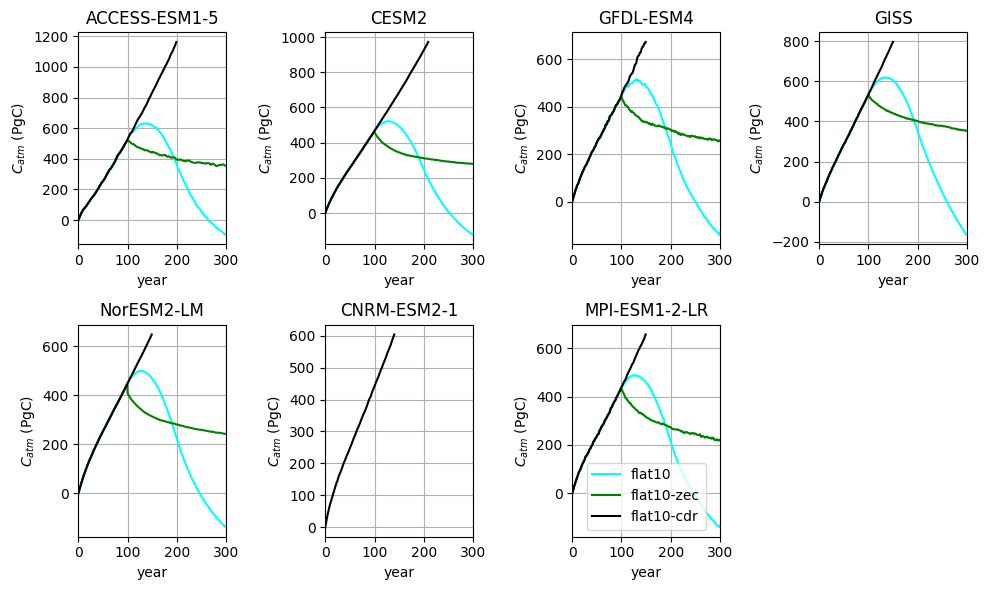

In [114]:
fig, axs = plt.subplots(2, 4,figsize=[10,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    try:
        ed[m]['flat10-cdr']['C_atm'].plot(color='cyan',ax=axs[i],label='flat10')
    except:
        print('fail cdr')
    try:
        ed[m]['flat10-zec']['C_atm'].plot(color='green',ax=axs[i],label='flat10-zec')
    except:
        print('fail zec')
    try:

        ed[m]['flat10']['C_atm'].plot(color='k',ax=axs[i],label='flat10-cdr')
    except:
        print('fail flat')
        

    axs[i].set_title(m)
    axs[i].set_ylabel(r'$C_{atm}$ (PgC)')    
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1900,2000])
    axs[i].set_xticklabels([0,100,200,300])
    axs[i].grid()
axs[7].set_axis_off()
plt.tight_layout()
axs[6].legend()
    


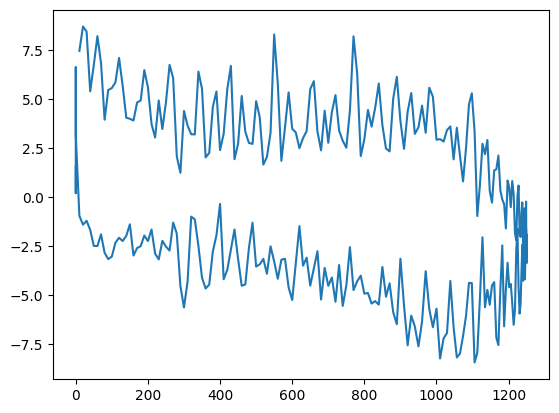

In [115]:
emi=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas']))
cumem=np.cumsum(emi)
plt.plot(cumem[:-1],ed[m]['flat10-cdr']['C_atm'].diff('year'))

ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
CNRM-ESM2-1
MPI-ESM1-2-LR


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


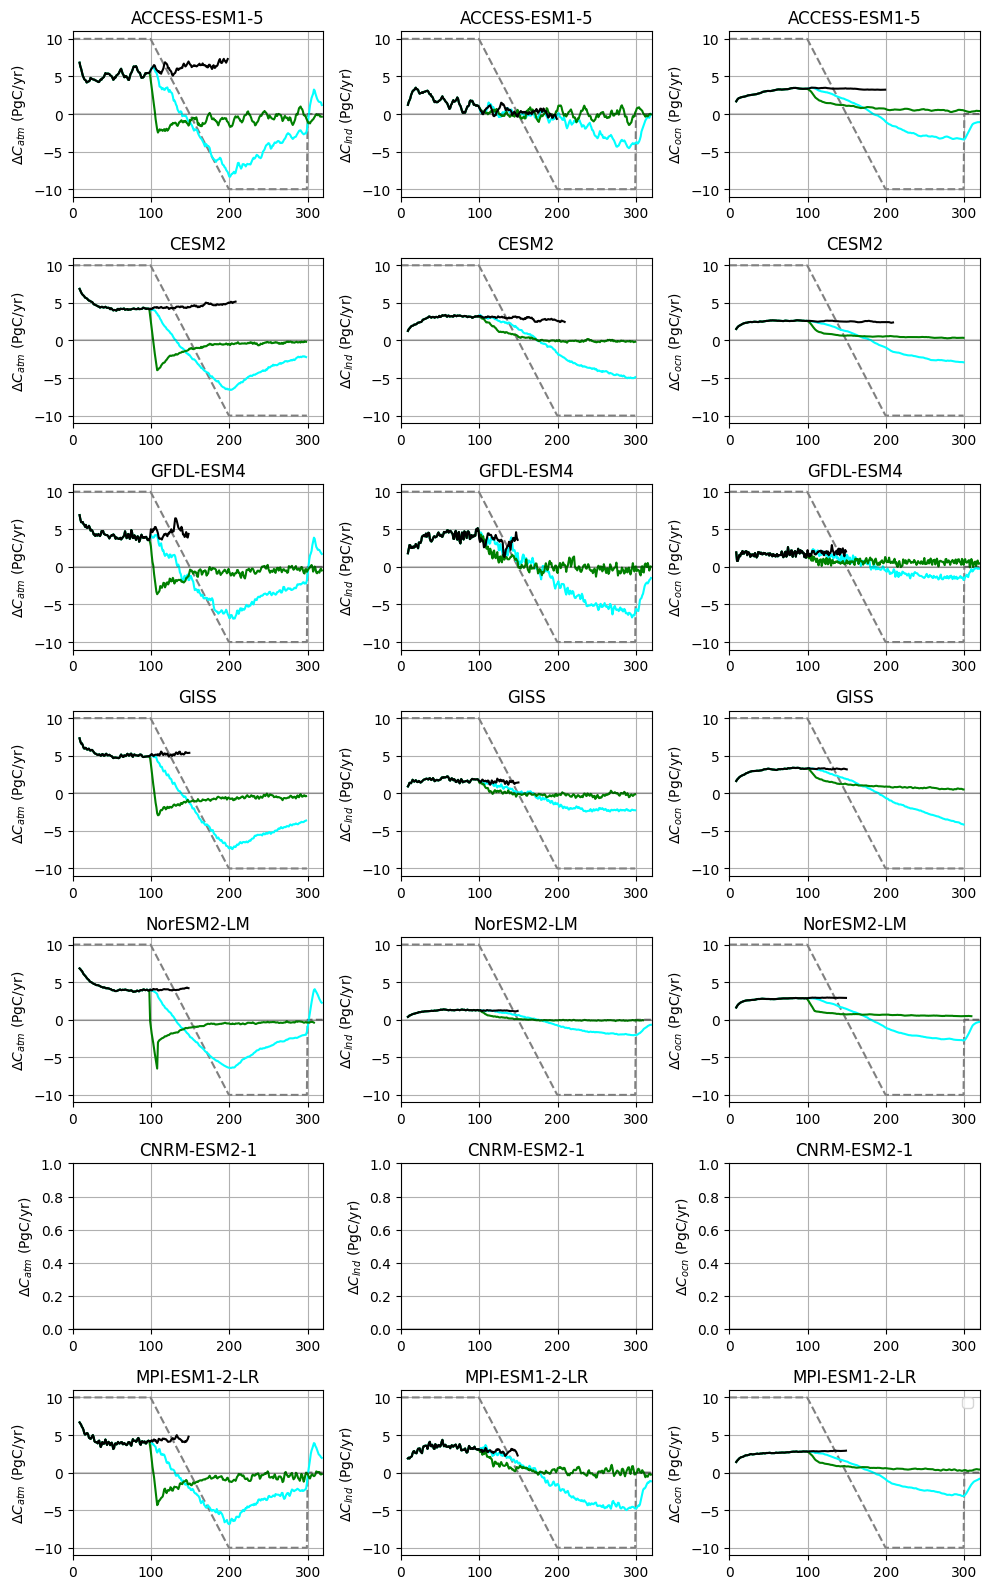

In [116]:
fig, axs = plt.subplots(7, 3,figsize=[10,16])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    try:
        emi=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas']))

        axs[3*i].plot(emi,color='grey',linestyle='--')
        axs[3*i].plot(ed[m]['flat10-cdr']['C_atm'].diff('year').rolling(year=10).mean(),color='cyan')
        axs[3*i].plot(ed[m]['flat10-zec']['C_atm'].diff('year').rolling(year=10).mean(),color='green')
        axs[3*i].plot(ed[m]['flat10']['C_atm'].diff('year').rolling(year=10).mean(),color='k')
    except:
        0
    axs[3*i].axhline(0,color='k',alpha=0.2)
    axs[3*i].set_title(m)
    axs[3*i].set_ylabel(r'$\Delta C_{atm}$ (PgC/yr)')    
    axs[3*i].set_xlim([0,320])
    axs[3*i].grid()
    
    try:
        emi=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas']))

        axs[3*i+1].plot(emi,color='grey',linestyle='--')
        axs[3*i+1].plot(ed[m]['flat10-cdr']['nbp'].rolling(year=10).mean(),color='cyan')
        axs[3*i+1].plot(ed[m]['flat10-zec']['nbp'].rolling(year=10).mean(),color='green')
        axs[3*i+1].plot(ed[m]['flat10']['nbp'].rolling(year=10).mean(),color='k')
    except:
        0
    axs[3*i+1].axhline(0,color='k',alpha=0.2)
    axs[3*i+1].set_title(m)
    axs[3*i+1].set_ylabel(r'$\Delta C_{lnd}$ (PgC/yr)')    
    axs[3*i+1].set_xlim([0,320])
    axs[3*i+1].grid()
    try:
        emi=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas']))

        axs[3*i+2].plot(emi,color='grey',linestyle='--')
        axs[3*i+2].plot(ed[m]['flat10-cdr']['fgco2'].rolling(year=10).mean(),color='cyan')
        axs[3*i+2].plot(ed[m]['flat10-zec']['fgco2'].rolling(year=10).mean(),color='green')
        axs[3*i+2].plot(ed[m]['flat10']['fgco2'].rolling(year=10).mean(),color='k')
    except:
        0
    axs[3*i+2].axhline(0,color='k',alpha=0.2)
    axs[3*i+2].set_title(m)
    axs[3*i+2].set_ylabel(r'$\Delta C_{ocn}$ (PgC/yr)')    
    axs[3*i+2].set_xlim([0,320])
    axs[3*i+2].grid()    
plt.tight_layout()
axs[20].legend()
    

In [73]:
from scipy.signal import savgol_filter





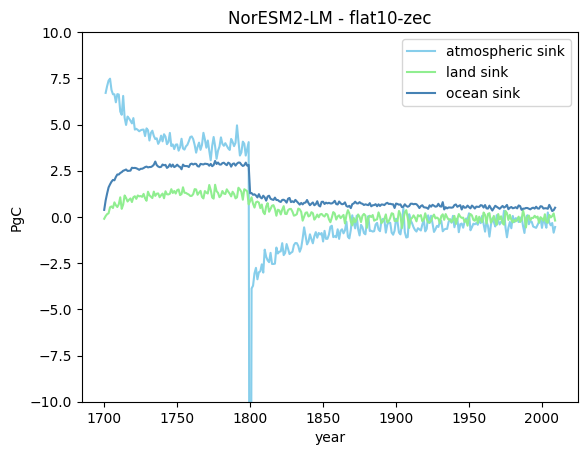

In [117]:
m='NorESM2-LM'
tmpa=ed[m]['flat10-zec']['C_atm'].diff('year').pad(year=(0,1)).copy()
tmpl=ed[m]['flat10-zec']['nbp'].copy()
tmpo=ed[m]['flat10-zec']['fgco2'].copy()

tmpa.plot(color='skyblue',label='atmospheric sink')
tmpl.plot(color='lightgreen',label='land sink')
tmpo.plot(color='steelblue',label='ocean sink')
plt.ylim([-10,10])
plt.ylabel('PgC')
plt.title(m+' - flat10-zec')
plt.legend()


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
CNRM-ESM2-1
MPI-ESM1-2-LR


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


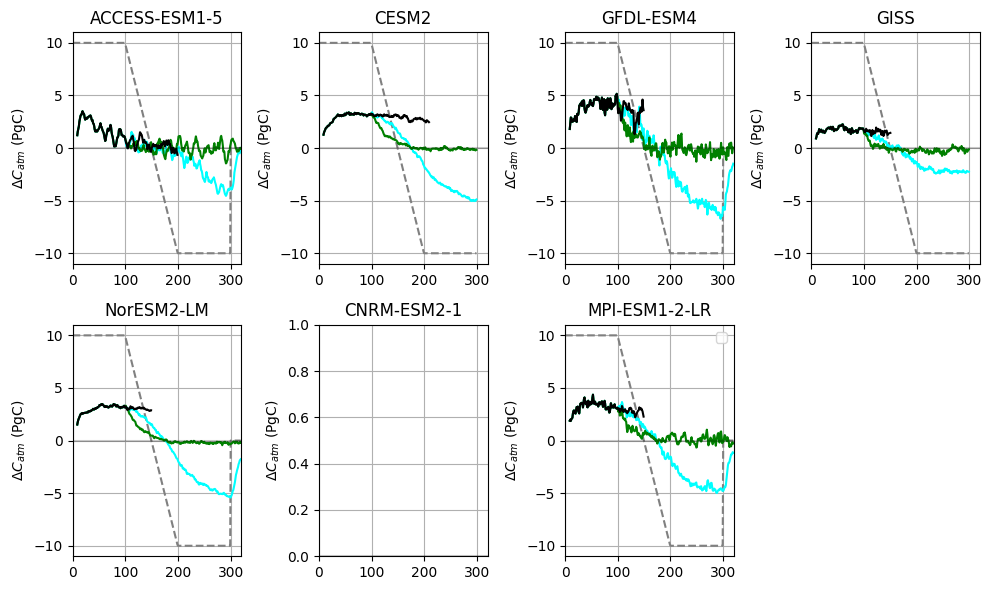

In [ ]:
fig, axs = plt.subplots(2, 4,figsize=[10,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    try:
        emi=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas']))

        axs[i].plot(emi,color='grey',linestyle='--')
        axs[i].plot(ed[m]['flat10-cdr']['nbp'].rolling(year=10).mean(),color='cyan')
        axs[i].plot(ed[m]['flat10-zec']['nbp'].rolling(year=10).mean(),color='green')
        axs[i].plot(ed[m]['flat10']['nbp'].rolling(year=10).mean(),color='k')
    except:t
        0
    axs[i].axhline(0,color='k',alpha=0.2)
    axs[i].set_title(m)
    axs[i].set_ylabel(r'$\Delta C_{atm}$ (PgC)')    
    axs[i].set_xlim([0,320])
    axs[i].grid()
plt.tight_layout()
axs[7].set_axis_off()
plt.tight_layout()
axs[6].legend()
    

ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
CNRM-ESM2-1
fail cdr
MPI-ESM1-2-LR


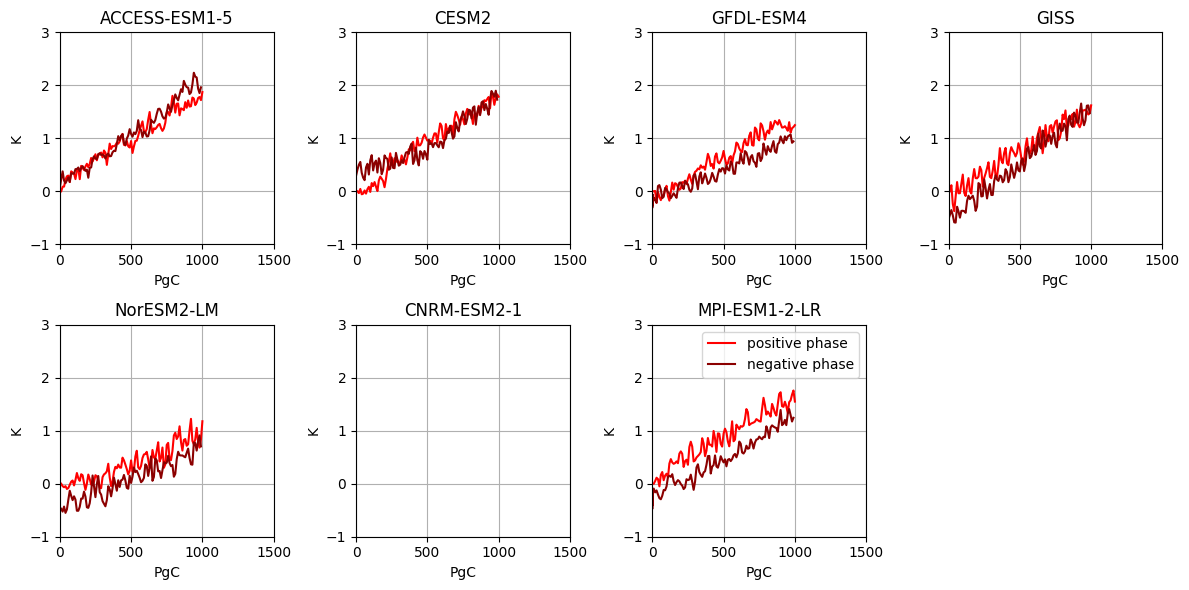

In [ ]:
fig, axs = plt.subplots(2, 4,figsize=[12,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    tz=ed[m]['flat10']['tas'][0]
    try:
        cumem=np.cumsum(extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas'])))

        axs[i].plot(cumem[:100],ed[m]['flat10-cdr']['tas'][:100]-tz,'r',label='positive phase')
        #axs[i].plot(cumem[100:200],ed[m]['flat10-cdr']['tas'][100:200]-tz,'c',label='transition phase')
        axs[i].plot(cumem[200:],ed[m]['flat10-cdr']['tas'][200:]-tz,'darkred',label='negative phase')
    except:
        print('fail cdr')
    axs[i].set_title(m)
    axs[i].set_ylim([-1,3])
    axs[i].set_xlim([0,1500])
    axs[i].set_xlabel('PgC')
    axs[i].set_ylabel('K')
    
    axs[i].grid()
    

axs[7].set_axis_off()
plt.tight_layout()
axs[6].legend()



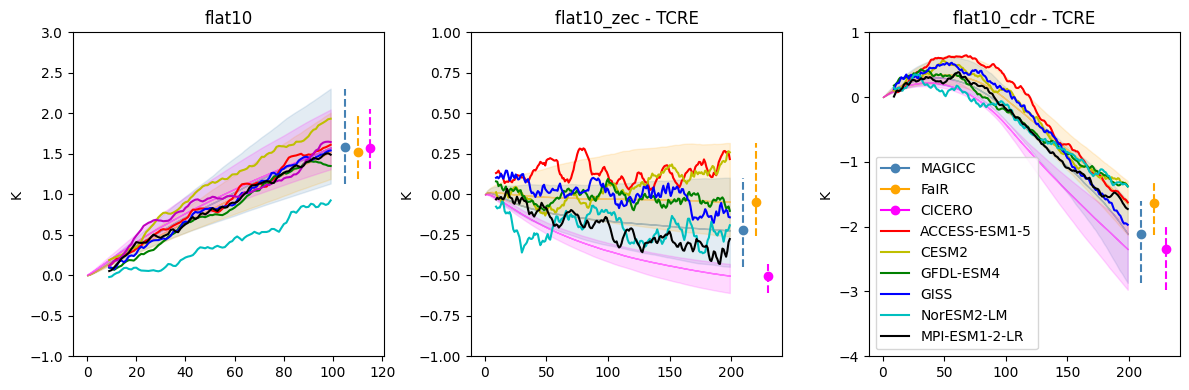

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=[12,4])
axs=axs.flatten()

mcols=['r','y','g','b','c','m','k']


plot_range(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)).T,axs[0],prctl=[10,50,90])
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(00,100)).T,105,99,axs[0],prctl=[10,50,90],col='steelblue',linestyle='--',lbl='MAGICC')


plot_range(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),axs[0],prctl=[10,50,90],col='orange')
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),110,99,axs[0],prctl=[10,50,90],col='orange',linestyle='--',lbl='FaIR')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),axs[0],prctl=[10,50,90],col='magenta')
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(00,100)),115,99,axs[0],prctl=[10,50,90],col='magenta',linestyle='--',lbl='CICERO')

pl=[]
for i,m in enumerate(mdls):
    try:
     cn0=ed[m]['flat10']['tas'][:20].mean()-(ed[m]['flat10']['tas'][10:30:1].mean()-ed[m]['flat10']['tas'][:20].mean())
     tmp==axs[0].plot(ed[m]['flat10']['tas'][:100].rolling(year=10).mean()-cn0,color=mcols[i],label=m)
     pl.append(tmp[0])
    except:
        0
    axs[0].set_ylim([-1,3])
axs[0].set_title('flat10')
axs[0].set_ylabel('K')


plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100,axs[1],prctl=[10,50,90])
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100,210,199,axs[1],prctl=[10,50,90],col='steelblue',linestyle='--',lbl='MAGICC')


plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100,axs[1],prctl=[10,50,90],col='orange')
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100,220,199,axs[1],prctl=[10,50,90],col='orange',linestyle='--',lbl='FaIR')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100,axs[1],prctl=[10,50,90],col='magenta')
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100,230,199,axs[1],prctl=[10,50,90],col='magenta',linestyle='--',lbl='CICERO')

pl=[]
for i,m in enumerate(mdls):
    try:
     tmp==axs[1].plot(ed[m]['flat10-zec']['tas'][100:300].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),color=mcols[i],label=m)
     pl.append(tmp[0])
    except:
        0
axs[1].set_ylim([-1,1])
axs[1].set_title('flat10_zec - TCRE')
axs[1].set_ylabel('K')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,axs[2],prctl=[10,50,90])
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,210,199,axs[2],prctl=[10,50,90],col='steelblue',linestyle='--',lbl='MAGICC')

plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,axs[2],prctl=[10,50,90],col='orange')
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,220,199,axs[2],prctl=[10,50,90],col='orange',linestyle='--',lbl='FaIR')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100,axs[2],prctl=[10,50,90],col='magenta')
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100,230,199,axs[2],prctl=[10,50,90],col='magenta',linestyle='--',lbl='CICERO')

pl=[]
for i,m in enumerate(mdls):
    try:
     tmp==axs[2].plot(ed[m]['flat10-cdr']['tas'][100:300].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),color=mcols[i],label=m)
     pl.append(tmp[0])
    except:
        0
    axs[2].set_ylim([-4,1])
axs[2].legend()
axs[2].set_title('flat10_cdr - TCRE')
axs[2].set_ylabel('K')
plt.tight_layout()

    

In [57]:
mdls

['ACCESS-ESM1-5',
 'CESM2',
 'GFDL-ESM4',
 'GISS',
 'NorESM2-LM',
 'CNRM-ESM2-1',
 'MPI-ESM1-2-LR']

In [58]:
ed['GISS']

/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/IPython/core/magics/code.py:464: UserWarning: Argument given ([GISS]) can't be found as a variable or as a filename.
  warn("Argument given (%s) can't be found as a variable "


TypeError: expected str, bytes or os.PathLike object, not NoneType

ACCESS-ESM1-5
fail cdr
0
0
CESM2
fail cdr
0
0
GFDL-ESM4
fail cdr
0
0
GISS
fail cdr
0
0
NorESM2-LM
fail cdr
0
0
CNRM-ESM2-1
fail cdr
0
0
MPI-ESM1-2-LR
fail cdr
0
0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


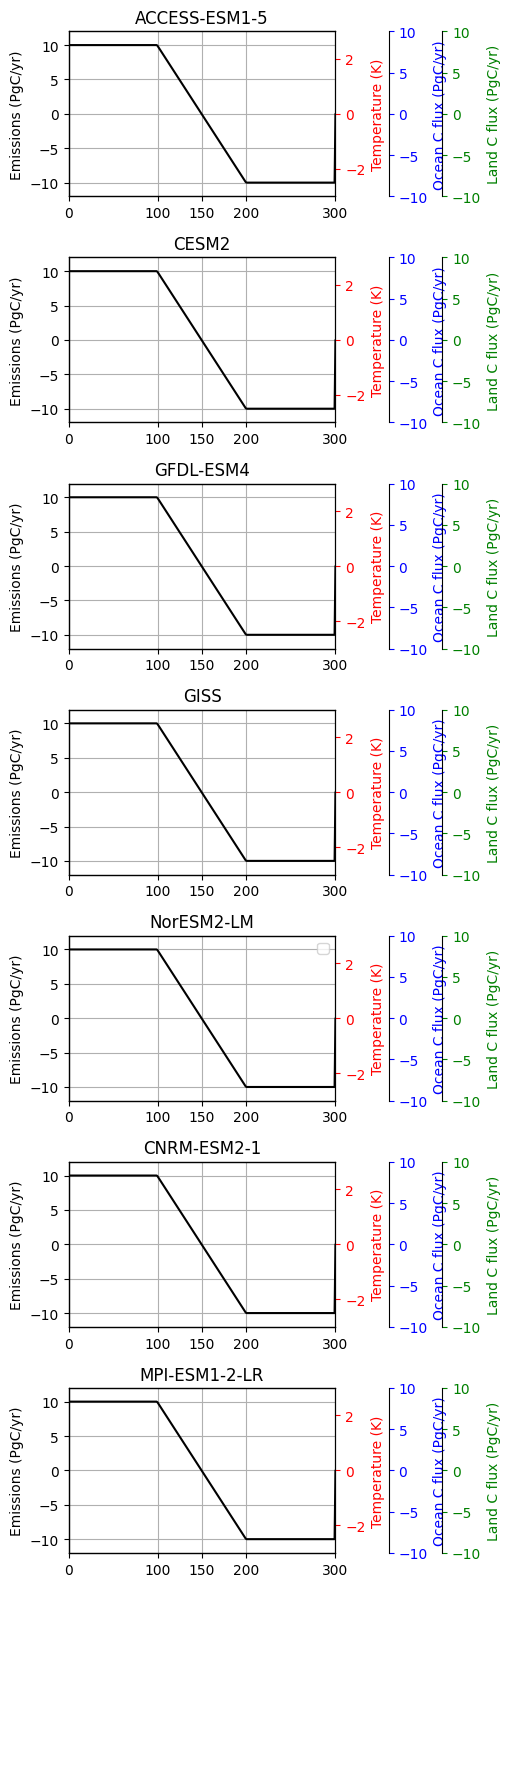

In [30]:
fig, axs = plt.subplots(8, 1,figsize=[6,18])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    twin1 = axs[i].twinx()
    twin2 = axs[i].twinx()
    twin3 = axs[i].twinx()
    
    twin2.spines.right.set_position(("axes", 1.2))
    twin3.spines.right.set_position(("axes", 1.4))
    
    axs[i].plot(np.arange(1700,2020),e_flat10_cdr['Emission Rate (PgC a-1)'],'k')

    try:
        (ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='red',ax=twin1,label='flat10')
    except:
        print('fail cdr')
    
    try:
        (ed[m]['flat10-cdr']['fgco2']).rolling(year=10).mean().plot(color='blue',ax=twin2,label='flat10')

    except:
        print(0)
    try:
        
        (ed[m]['flat10-cdr']['nbp']).rolling(year=10).mean().plot(color='green',ax=twin3,label='flat10')

    except:
        print(0)        
    twin1.set_title('')
    twin2.set_title('')
    twin3.set_title('')
    
    twin1.set_ylim([-3,3])
    twin2.set_ylim([-10,10])
    twin3.set_ylim([-10,10])
    axs[i].set_ylabel('Emissions (PgC/yr)')
    twin1.set_ylabel('Temperature (K)')
    twin2.set_ylabel('Ocean C flux (PgC/yr)')
    twin3.set_ylabel('Land C flux (PgC/yr)')    
    twin1.tick_params(axis='y', colors='red')
    twin1.yaxis.label.set_color('red')
    twin2.tick_params(axis='y', colors='blue')
    twin2.yaxis.label.set_color('blue')
    twin3.tick_params(axis='y', colors='green')
    twin3.yaxis.label.set_color('green')        
    axs[i].set_title(m)
    axs[i].set_ylim([-12,12])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1850,1900,2000])
    axs[i].set_xticklabels([0,100,150,200,300])
    axs[i].grid()
axs[7].set_axis_off()
plt.tight_layout()
axs[4].legend()



ACCESS-ESM1-5
fail cdr
0
0
0
CESM2
fail cdr
0
0
0
GFDL-ESM4
fail cdr
0
0
0
GISS
fail cdr
0
0
0
NorESM2-LM
fail cdr
0
0
0
CNRM-ESM2-1
fail cdr
0
0
0
MPI-ESM1-2-LR
fail cdr
0
0
0


NameError: name 'p1' is not defined

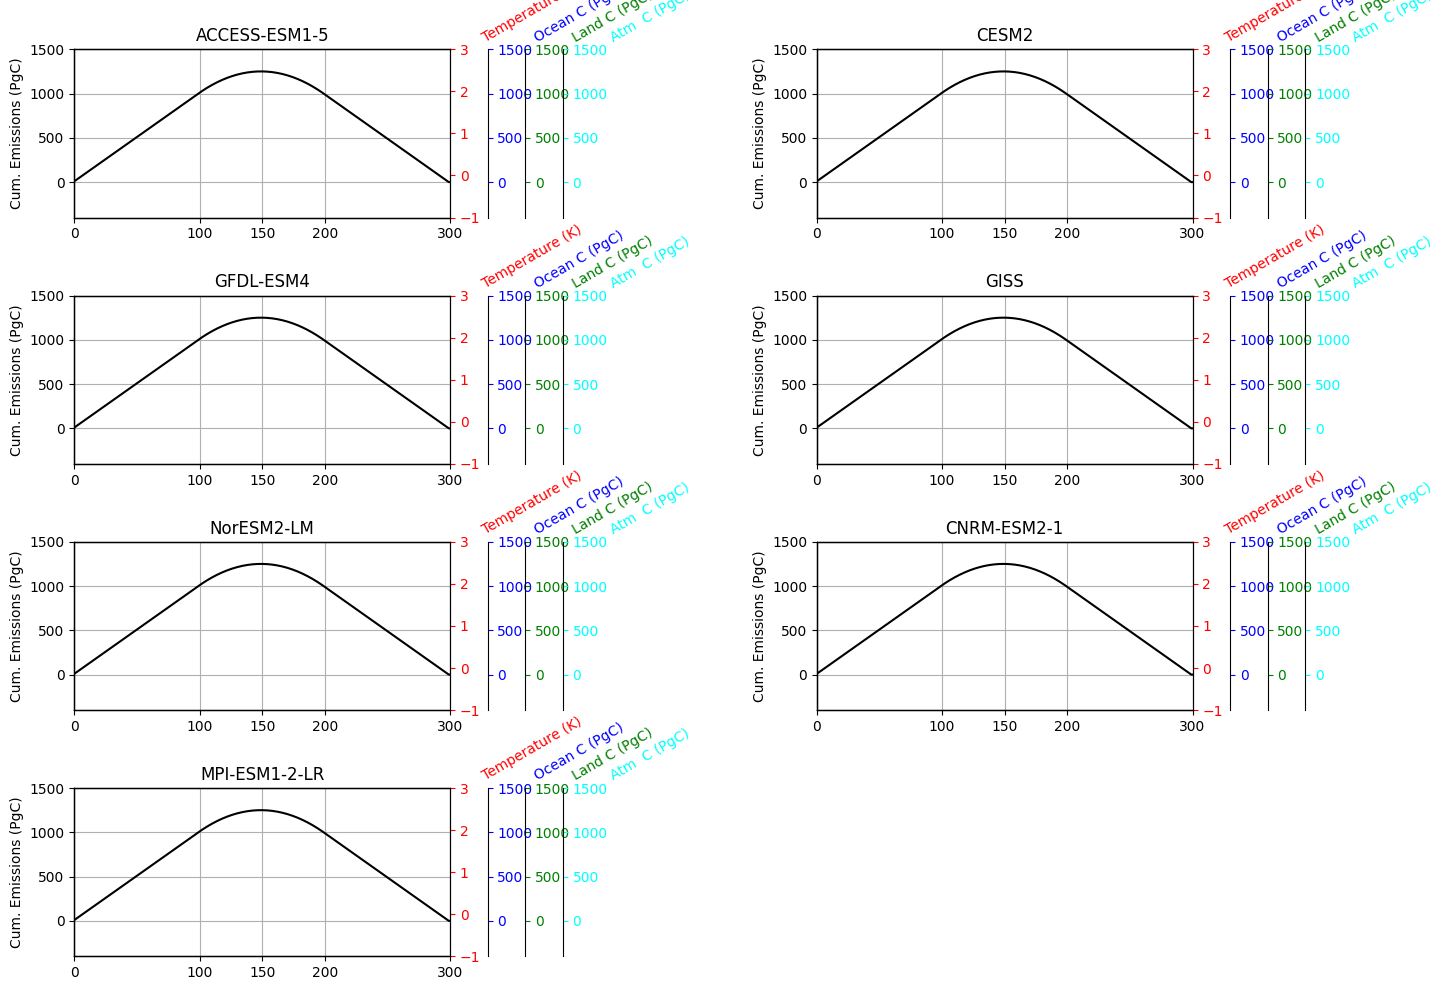

In [25]:
fig, axs = plt.subplots(4, 2,figsize=[15,10])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    twin1 = axs[i].twinx()
    twin2 = axs[i].twinx()
    twin3 = axs[i].twinx()
    twin4 = axs[i].twinx()
    
    twin2.spines.right.set_position(("axes", 1.1))
    twin3.spines.right.set_position(("axes", 1.2))
    twin4.spines.right.set_position(("axes", 1.3))
    
    
    axs[i].plot(np.arange(1700,2020),np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)']),'k')

    try:
        p1=(ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='red',ax=twin1,label='flat10')
        p2=(ed[m]['flat10-cdr']['tas'][150:]-ed[m]['flat10']['tas'][0]).plot(color='darkred',ax=twin1,label='flat10')
        
        mxy=ed[m]['flat10-cdr']['tas'].rolling(year=40, center=True).mean().idxmax()
        t100=ed[m]['flat10-cdr']['tas'][90:110].mean()
        t200=ed[m]['flat10-cdr']['tas'][190:210].mean()
        
        p3=twin1.axvline(mxy,color='k',linestyle='--')
        p4=twin1.axhline(t100-ed[m]['flat10']['tas'][0],color='r',linestyle='--')
        p5=twin1.axhline(t200-ed[m]['flat10']['tas'][0],color='darkred',linestyle='--')
        
        
    except:
        print('fail cdr')
    
    try:
        (ed[m]['flat10-cdr']['fgco2']).cumsum().plot(color='blue',ax=twin2,label='flat10')

    except:
        print(0)
    try:
        
        (ed[m]['flat10-cdr']['nbp']).cumsum().plot(color='green',ax=twin3,label='flat10')

    except:
        print(0)        
    try:
        
        (ed[m]['flat10-cdr']['C_atm']).plot(color='cyan',ax=twin4,label='flat10')

    except:
        print(0)          
    twin1.set_title('')
    twin2.set_title('')
    twin3.set_title('')
    twin4.set_title('')
    
    twin1.set_ylim([-1,3])
    twin2.set_ylim([-400,1500])
    twin3.set_ylim([-400,1500])
    twin4.set_ylim([-400,1500])
    
    axs[i].set_ylabel('Cum. Emissions (PgC)')
    twin1.set_ylabel('Temperature (K)', ha='left', y=1.1, rotation=30, labelpad=0)
    twin2.set_ylabel('Ocean C (PgC)', ha='left', y=1.1, rotation=30, labelpad=0)
    twin3.set_ylabel('Land C (PgC)', ha='left', y=1.1, rotation=30, labelpad=0)    
    twin4.set_ylabel('Atm  C (PgC)', ha='left', y=1.1, rotation=30, labelpad=0)    
    
    twin1.tick_params(axis='y', colors='red')
    twin1.yaxis.label.set_color('red')
    twin2.tick_params(axis='y', colors='blue')
    twin2.yaxis.label.set_color('blue')
    twin3.tick_params(axis='y', colors='green')
    twin3.yaxis.label.set_color('green')       
    twin4.tick_params(axis='y', colors='cyan')
    twin4.yaxis.label.set_color('cyan')  
    axs[i].set_title(m)
    axs[i].set_ylim([-400,1500])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1850,1900,2000])
    axs[i].set_xticklabels([0,100,150,200,300])
    axs[i].grid()
axs[7].set_axis_off()
plt.tight_layout()

lg=plt.legend([p1[0],p2[0],p3,p4,p5],['flat10','flat10 (post 150)','max temp','temp 100','temp 200'],bbox_to_anchor=(2.5, .7))


In [24]:
esm_tcre=np.zeros(len(mdls))
for i,m in enumerate(mdls):
    
    esm_tcre[i]=ed[m]['flat10']['tas'][90:110].mean().values
    try:
        esm_zec50[i]=(ed[m]['flat10_zec']['tas'][140:160].mean().values)-esm_tcre[i]
        esm_zec100[i]=(ed[m]['flat10_zec']['tas'][190:210].mean().values)-esm_tcre[i]
    except:
        0


NameError: name 'ed' is not defined

In [ ]:
data = {'Name': ['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','CNRM-ESM2-1','MPI-ESM1-2-LR'],
        'TCRE': [1.9,2.0,1.2,np.NaN,1.32,1.63,1.65],
        'TCR':[1.9,2.0,1.2,np.NaN,1.32,1.63,1.65],
        'CUMEM':[1064,1073,1066,np.NaN,1075,1124,1127]}
df_zec = pd.DataFrame(data)

In [ ]:
esm_tcre

array([1.74455571, 1.95511848, 1.49980009, 1.64084549, 1.00889738,
       1.66852359, 1.45670009])

In [23]:
plt.plot(df_zec['TCRE'],esm_tcre,'*')
plt.text(df_zec['TCRE'].values,esm_tcre,mdls)

NameError: name 'df_zec' is not defined

In [ ]:
esm_tcre[0]

289.3782653808594

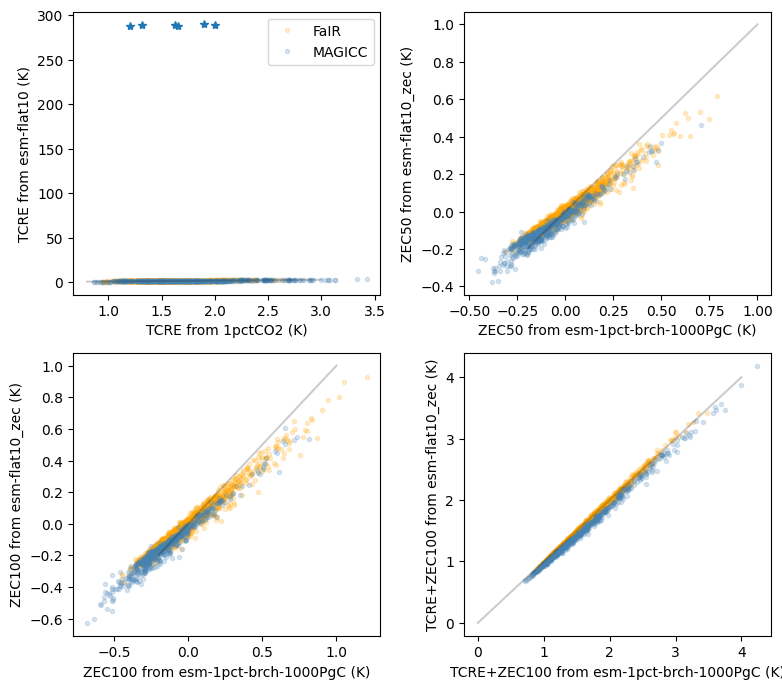

In [ ]:
fair_metrics=pd.read_csv('SCM_data/metrics/FaIR_metrics.csv',index_col=0)
magicc_metrics=pd.read_csv('SCM_data/metrics/MAGICC_metrics.csv',index_col=0)

fig = plt.figure(figsize=[8,7])

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax1 = fig.add_subplot(2,2,1)

p1=ax1.plot(fair_metrics['tcre'],t_100,'.',alpha=0.2, color='orange')
p2=ax1.plot(magicc_metrics['tcre_1pctco2'],m_100,'.',color='steelblue',alpha=0.2)

ax1.plot([0.8,3],[.8,3],'k-',alpha=0.2)
ax1.plot(df_zec['TCRE'],esm_tcre,'*')
ax1.set_ylabel('TCRE from esm-flat10 (K)')
ax1.set_xlabel('TCRE from 1pctCO2 (K)')

ax1.legend([p1[0],p2[0]],['FaIR','MAGICC'])

ax2 = fig.add_subplot(2,2,2)

z50=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m50=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax2.plot(fair_metrics['zec50'],ds_fair.zec50,'.',alpha=0.2,color='orange')
ax2.plot(magicc_metrics['zec50_esm-1pct-brch-1000pgc'],m50,'.',color='steelblue',alpha=0.2)

ax2.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
ax2.set_ylabel('ZEC50 from esm-flat10_zec (K)')
ax2.set_xlabel('ZEC50 from esm-1pct-brch-1000PgC (K)')

ax3 = fig.add_subplot(2,2,3)
z100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
ax3.plot(fair_metrics['zec100'],ds_fair.zec100,'.',alpha=0.2,color='orange')

ax3.plot(magicc_metrics['zec100_esm-1pct-brch-1000pgc'],m100,'.',color='steelblue',alpha=0.2)
ax3.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
ax3.set_ylabel('ZEC100 from esm-flat10_zec (K)')
ax3.set_xlabel('ZEC100 from esm-1pct-brch-1000PgC (K)')

ax4 = fig.add_subplot(2,2,4)
z100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
ax4.plot(fair_metrics['zec100']+fair_metrics['tcre'],ds_fair.zec100+ds_fair.tcre,'.',alpha=0.2,color='orange')
ax4.plot(magicc_metrics['zec100_esm-1pct-brch-1000pgc']+magicc_metrics['tcre_1pctco2'],m100+m_100,'.',color='steelblue',alpha=0.2)

ax4.plot([0,4],[0,4],'k-',alpha=0.2)
ax4.set_ylabel('TCRE+ZEC100 from esm-flat10_zec (K)')
ax4.set_xlabel('TCRE+ZEC100 from esm-1pct-brch-1000PgC (K)')

plt.tight_layout()


In [ ]:
import scipy
from scipy import signal

In [ ]:
agtp_simp=np.zeros([1000,len(mdls)])
agtp_corr=np.zeros([1000,len(mdls)])
agtp_corr2=np.zeros([1000,len(mdls)])

for i,m in enumerate(mdls):

    tc_tst=(ed[m]['flat10'].tas[90:110]-ed[m]['flat10-cdr'].tas[0]).mean()
    zec50_tst=ed[m]['flat10-zec'].tas[140:160].mean()-ed[m]['flat10'].tas[90:110].mean()
    zec100_tst=ed[m]['flat10-zec'].tas[190:210].mean()-ed[m]['flat10'].tas[90:110].mean()
    tc_corr2=(tc_tst-zec100_tst/2)/np.sum(ed[m]['flat10'].fco2fos[:100])
    tc_corr=(tc_tst-zec50_tst)/np.sum(ed[m]['flat10'].fco2fos[:100])
    tc_simp=(tc_tst)/np.sum(ed[m]['flat10'].fco2fos[:100])
    agtp_simp[:,i]=tc_simp.values*np.ones(1000)
    agtp_corr[:,i]=tc_corr.values*np.ones(1000)+np.arange(0,1000)*zec50_tst.values/50/1000
    agtp_corr2[:,i]=tc_corr2.values*np.ones(1000)+np.arange(0,1000)*zec100_tst.values/100/1000




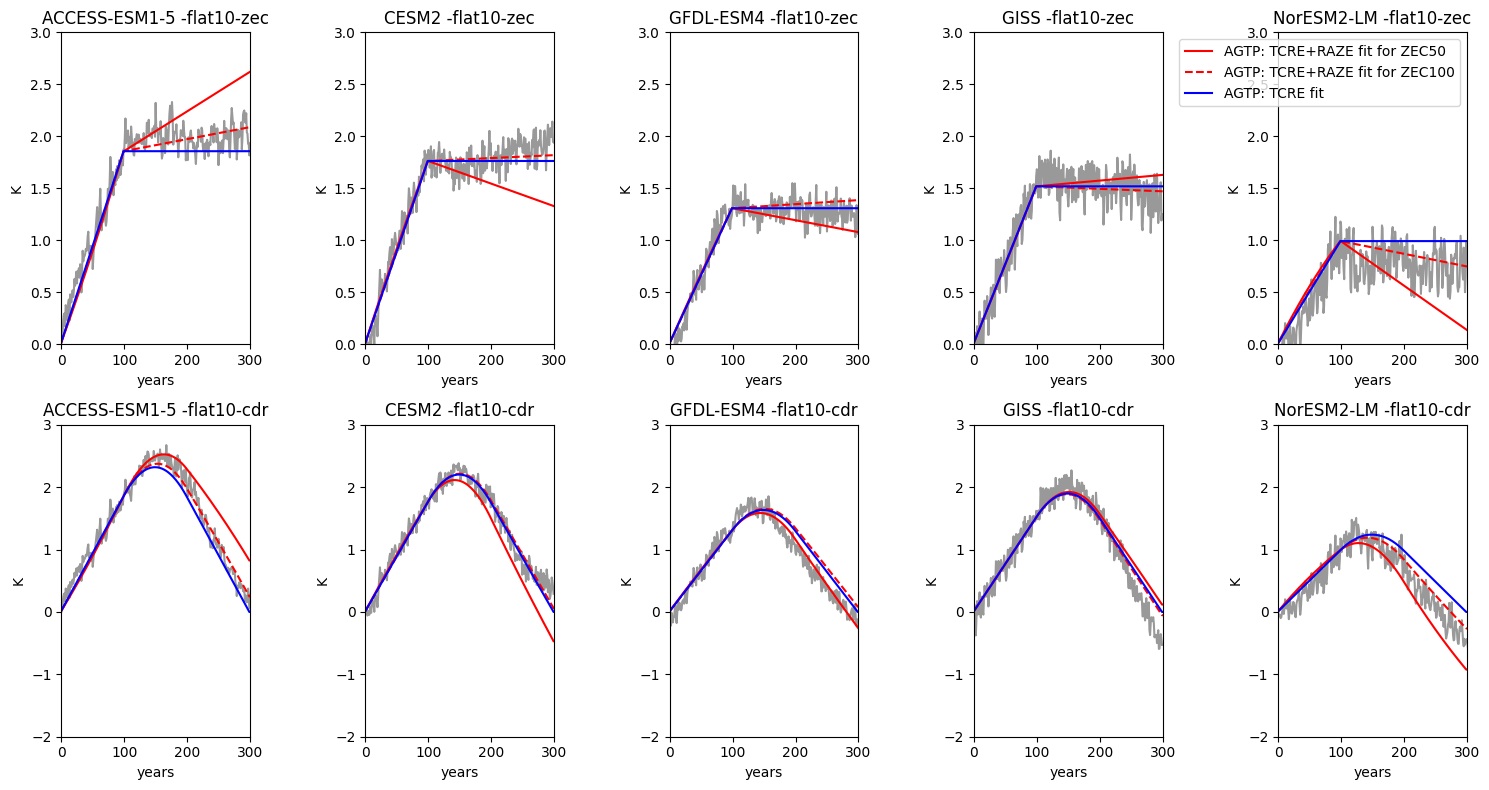

In [ ]:

fig, axs = plt.subplots(2, 5,figsize=[15,8])
axs=axs.T
for i,m in enumerate(mdls):
    axs[i,0].plot(ed[m]['flat10-zec'].tas-ed[m]['flat10-cdr'].tas[0],'k',alpha=0.4)

    p1=axs[i,0].plot(signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'r')
    p2=axs[i,0].plot(signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'r--')
    p3=axs[i,0].plot(signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'b')

    axs[i,0].set_xlim(0,300)
    axs[i,0].set_ylim(0,3)
    
    axs[i,0].set_xlabel('years')
    axs[i,0].set_ylabel('K')
    axs[i,0].set_title(m+' -flat10-zec')
    axs[i,1].plot(ed[m]['flat10-cdr'].tas-ed[m]['flat10-cdr'].tas[0],'k',alpha=0.4)

    axs[i,1].plot(signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'r')
    axs[i,1].plot(signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'r--')
    axs[i,1].plot(signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'b')

    axs[i,1].set_xlim(0,300)
    axs[i,1].set_ylim(-2,3)
    
    axs[i,1].set_xlabel('years')
    axs[i,1].set_ylabel('K')
    axs[i,1].set_title(m+' -flat10-cdr')
    
axs[4,0].legend([p1[0],p2[0],p3[0]],['AGTP: TCRE+RAZE fit for ZEC50','AGTP: TCRE+RAZE fit for ZEC100','AGTP: TCRE fit',])

plt.tight_layout()

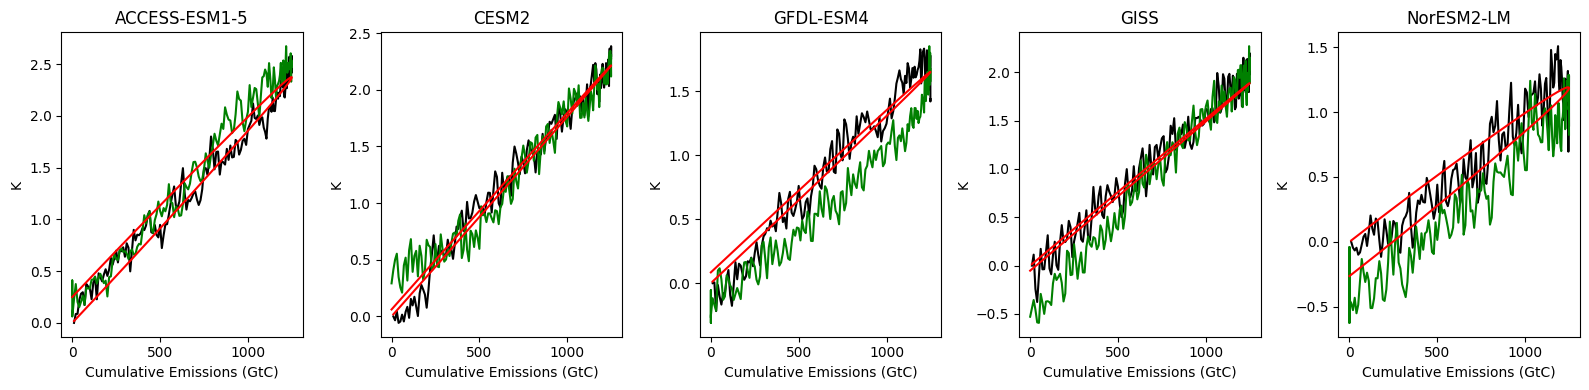

In [ ]:
fig, axs = plt.subplots(1, 5,figsize=[16,4])
for i,m in enumerate(mdls):
    l=len(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]))
    axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:150]),ed[m]['flat10-cdr'].tas[:150]-ed[m]['flat10-cdr'].tas[0],'k')
    axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos)[150:],ed[m]['flat10-cdr'].tas[150:]-ed[m]['flat10-cdr'].tas[0],'g')
    
    #axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]),signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:])[:l],'r--')
    axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]),signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:])[:l],'r-')
    #axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]),signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:])[:l],'b-')
    axs[i].set_xlabel('Cumulative Emissions (GtC)')
    axs[i].set_ylabel('K')
    axs[i].set_title(m)
plt.tight_layout()

Text(0, 0.5, 'warming per EgC')

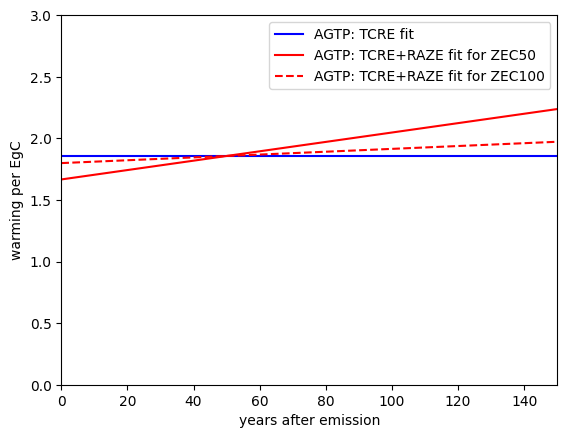

In [ ]:
p1=plt.plot(agtp_simp[:,0]*1000,'b')
p2=plt.plot(agtp_corr[:,0]*1000,'r')
p3=plt.plot(agtp_corr2[:,0]*1000,'r--')

plt.ylim(0,3)
plt.xlim(0,150)
plt.legend([p1[0],p2[0],p3[0]],['AGTP: TCRE fit','AGTP: TCRE+RAZE fit for ZEC50','AGTP: TCRE+RAZE fit for ZEC100'])
plt.xlabel('years after emission')
plt.ylabel('warming per EgC')

In [ ]:
def tfun(x,t):
  out=x[0]*t*np.exp(-t/x[1])+x[2]+t*x[3]
  return out

In [ ]:
def implsfun(x,trg,e):
  impls=signal.convolve(tfun(x[:],np.arange(0,len(trg)))/100,e)
  
  return impls

In [ ]:
def residfun(x,trg,e):
  impls=implsfun(x,trg,e)
  out=np.sum((impls[:len(trg)]-trg)**2)
  
  return out

In [ ]:
opt=[]
for i,m in enumerate(mdls):
    tsamp=ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values
    Ecn0=ed[m]['flat10-cdr'].fco2fos[:len(tsamp)].values
    opt.append(scipy.optimize.minimize(lambda x: residfun(x,tsamp,Ecn0), [1.30653195e-02, 2.96387774e+01, 2.54539140e-02, 4.99515589e-04]))

In [ ]:
opt=[]
for i,m in enumerate(mdls):
    tsamp1=ed[m]['flat10-zec'].tas.values-ed[m]['flat10-zec'].tas[0].values
    tsamp2=ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values
    tsamp3=ed[m]['flat10'].tas.values-ed[m]['flat10-cdr'].tas[0].values
    

    Ecn0=ed[m]['flat10-zec'].fco2fos[:len(tsamp)].values
    Ecnc=ed[m]['flat10-cdr'].fco2fos[:len(tsamp)].values
    Ecn=ed[m]['flat10'].fco2fos[:len(tsamp)].values
    bnds = ((0.0,5e-03),(1,100),(0e-02,50e-2),(0e-4,20e-04))

    opt.append(scipy.optimize.minimize(lambda x: residfun(x,tsamp1,Ecn0)+residfun(x,tsamp2,Ecnc), [0.30653195e-02, 2.96387774e+01, 2.54539140e-02, 4.99515589e-04],bounds=bnds))

In [ ]:
tmp0=opt[0].x.copy()
tmp0[2]=0
tmp0[3]=0
tmp1=opt[0].x.copy()
tmp1[0]=0
tmp1[3]=0
tmp2=opt[0].x.copy()
tmp2[0]=0
tmp2[2]=0


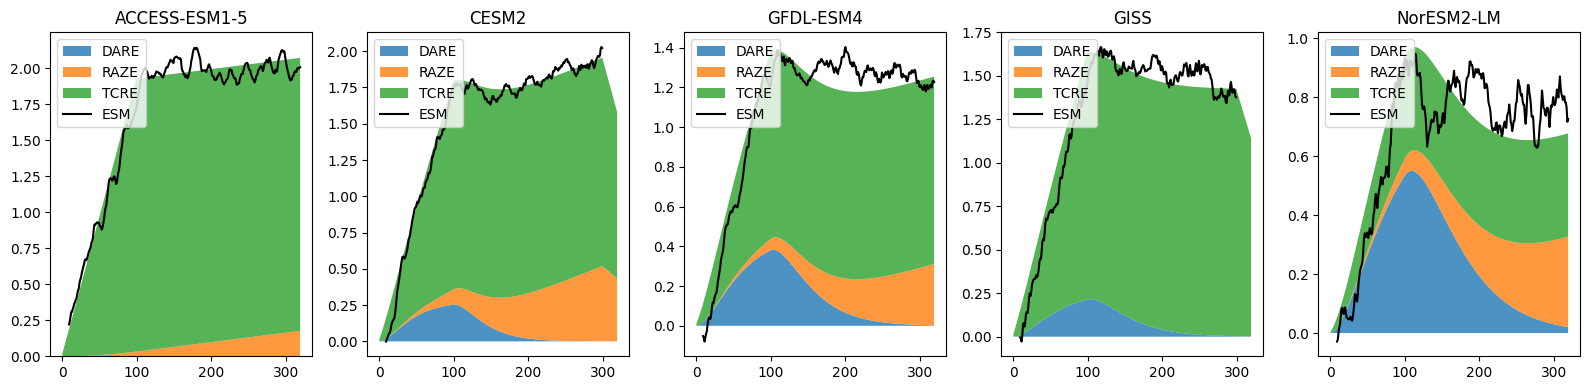

In [ ]:
fig, axs = plt.subplots(1, 5,figsize=[16,4])
for i,m in enumerate(mdls):
    tsampx=ed[m]['flat10-zec'].tas-ed[m]['flat10-zec'].tas[0]
    tsamp=tsampx.values

    Ecnz=ed[m]['flat10-zec'].fco2fos[:len(tsamp)].values

    tmp0=opt[i].x.copy()
    tmp0[2]=0
    tmp0[3]=0
    tmp1=opt[i].x.copy()
    tmp1[0]=0
    tmp1[3]=0
    tmp2=opt[i].x.copy()
    tmp2[0]=0
    tmp2[2]=0
    tmps=np.vstack([implsfun(tmp0,tsamp,Ecnz)[:l],implsfun(tmp2,tsamp,Ecnz)[:l],implsfun(tmp1,tsamp,Ecnz)[:l]])
    p1=axs[i].stackplot(np.arange(0,l),tmps,alpha=.8)
    
    p2=axs[i].plot(tsampx.rolling(year=10).mean(),'k')
    axs[i].set_title(m)
    axs[i].legend([p1[0],p1[1],p1[2],p2[0]],['DARE','RAZE','TCRE','ESM'],loc=2)
plt.tight_layout()
    

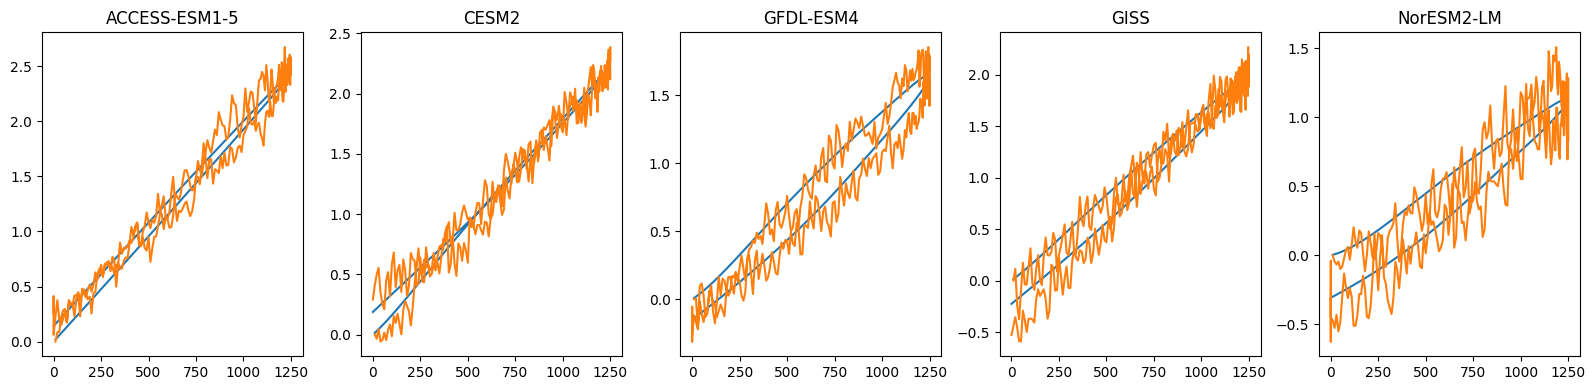

In [ ]:
fig, axs = plt.subplots(1, 5,figsize=[16,4])
for i,m in enumerate(mdls):
    tsamp=ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values

    Ecn0=ed[m]['flat10-cdr'].fco2fos[:len(tsamp)].values
    l=len(np.cumsum(Ecn0))
    axs[i].plot(np.cumsum(Ecn0),implsfun(opt[i].x,tsamp,Ecn0)[:l])
    axs[i].plot(np.cumsum(Ecn0),ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values)
    
    axs[i].set_title(m)
plt.tight_layout()

In [ ]:
p1

In [ ]:
tsamp

array([ 0.        , -0.04537611, -0.06608494, -0.04517027, -0.09885605,
       -0.08123429, -0.02020275,  0.03862204,  0.06077729, -0.0314765 ,
        0.07183648,  0.20289804,  0.103361  ,  0.05456226,  0.17956502,
        0.16015917,  0.01350945, -0.1153159 ,  0.00360188,  0.17342754,
        0.08893788, -0.01557068, -0.02748514,  0.03764534,  0.16076502,
        0.14098927,  0.06513534, -0.07377844, -0.08366632,  0.12479721,
        0.17608441,  0.19715909,  0.2348432 ,  0.37732258,  0.12131312,
       -0.04497953,  0.04095123,  0.22473636,  0.31857182,  0.29190375,
        0.36201799,  0.30689698,  0.30270981,  0.49249979,  0.44174418,
        0.36192785,  0.27683397,  0.17746916,  0.24727273,  0.44033388,
        0.228721  ,  0.25193206,  0.51472687,  0.62298255,  0.31014239,
        0.27508518,  0.33723943,  0.48532967,  0.55334166,  0.56130785,
        0.60181462,  0.45952308,  0.29779843,  0.35713637,  0.63704631,
        0.49648216,  0.47316421,  0.62753334,  0.78298255,  0.41

In [ ]:
impose={}
impose['B1500']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_B1500.txt',delimiter='\s',index_col=0)
impose['B1750']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_B1750.txt',delimiter='\s',index_col=0)
impose['B2000']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_B2000.txt',delimiter='\s',index_col=0)
impose['B2500']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_B2500.txt',delimiter='\s',index_col=0)
impose['OS250_000']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_OS250_000.txt',delimiter='\s',index_col=0)
impose['OS250_100']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_OS250_100.txt',delimiter='\s',index_col=0)
impose['OS500_000']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_OS500_000.txt',delimiter='\s',index_col=0)
impose['OS500_100']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_OS500_100.txt',delimiter='\s',index_col=0)
impose['OS1000_000']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_OS1000_000.txt',delimiter='\s',index_col=0)
impose['OS1000_100']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_OS1000_100.txt',delimiter='\s',index_col=0)


/var/folders/0r/7h737xr14lx_zdsv4znhxl6c0000gn/T/ipykernel_1104/1131366198.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  impose['B1500']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_B1500.txt',delimiter='\s',index_col=0)
/var/folders/0r/7h737xr14lx_zdsv4znhxl6c0000gn/T/ipykernel_1104/1131366198.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  impose['B1750']=pd.read_csv('IMPOSE/IMPOSEstats/IMPOSE_B1750.txt',delimiter='\s',index_col=0)
/var/folders/0r/7h737xr14lx_zdsv4znhxl6c0000gn/T/ipykernel_1104/1131366198.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not supp

In [ ]:
iexp=impose.keys()

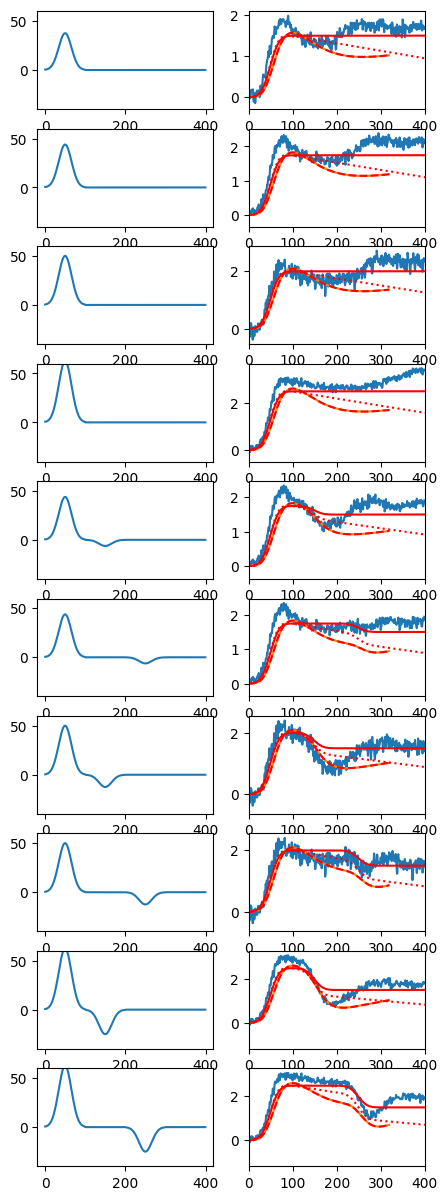

In [ ]:

fig, axs = plt.subplots(10, 2,figsize=[5,15])
for i,ex in enumerate(iexp):
    axs[i,0].plot(impose[ex]['co2em[PgC]'])
    axs[i,1].plot(impose[ex]['T_ESM[K]'])
    axs[i,1].plot(implsfun(opt[4].x,tsamp,impose[ex]['co2em[PgC]'])[:l])
    axs[i,1].plot(signal.convolve(agtp_simp[:,4],impose[ex]['co2em[PgC]']),'r')
    axs[i,1].plot(signal.convolve(agtp_corr2[:,4],impose[ex]['co2em[PgC]']),'r:')

    axs[i,1].plot(implsfun(opt[4].x,tsamp,impose[ex]['co2em[PgC]'])[:l],'r--')
    axs[i,1].set_xlim(0,400)
    axs[i,0].set_ylim(-40,60)


In [ ]:
tsamp=impose['B1750']['T_ESM[K]']
Ecn0=impose['B1750']['co2em[PgC]']
opt_impose=scipy.optimize.minimize(lambda x: residfun(x,tsamp,Ecn0), [1.30653195e-02, 2.96387774e+01, 2.54539140e-02, 4.99515589e-04])


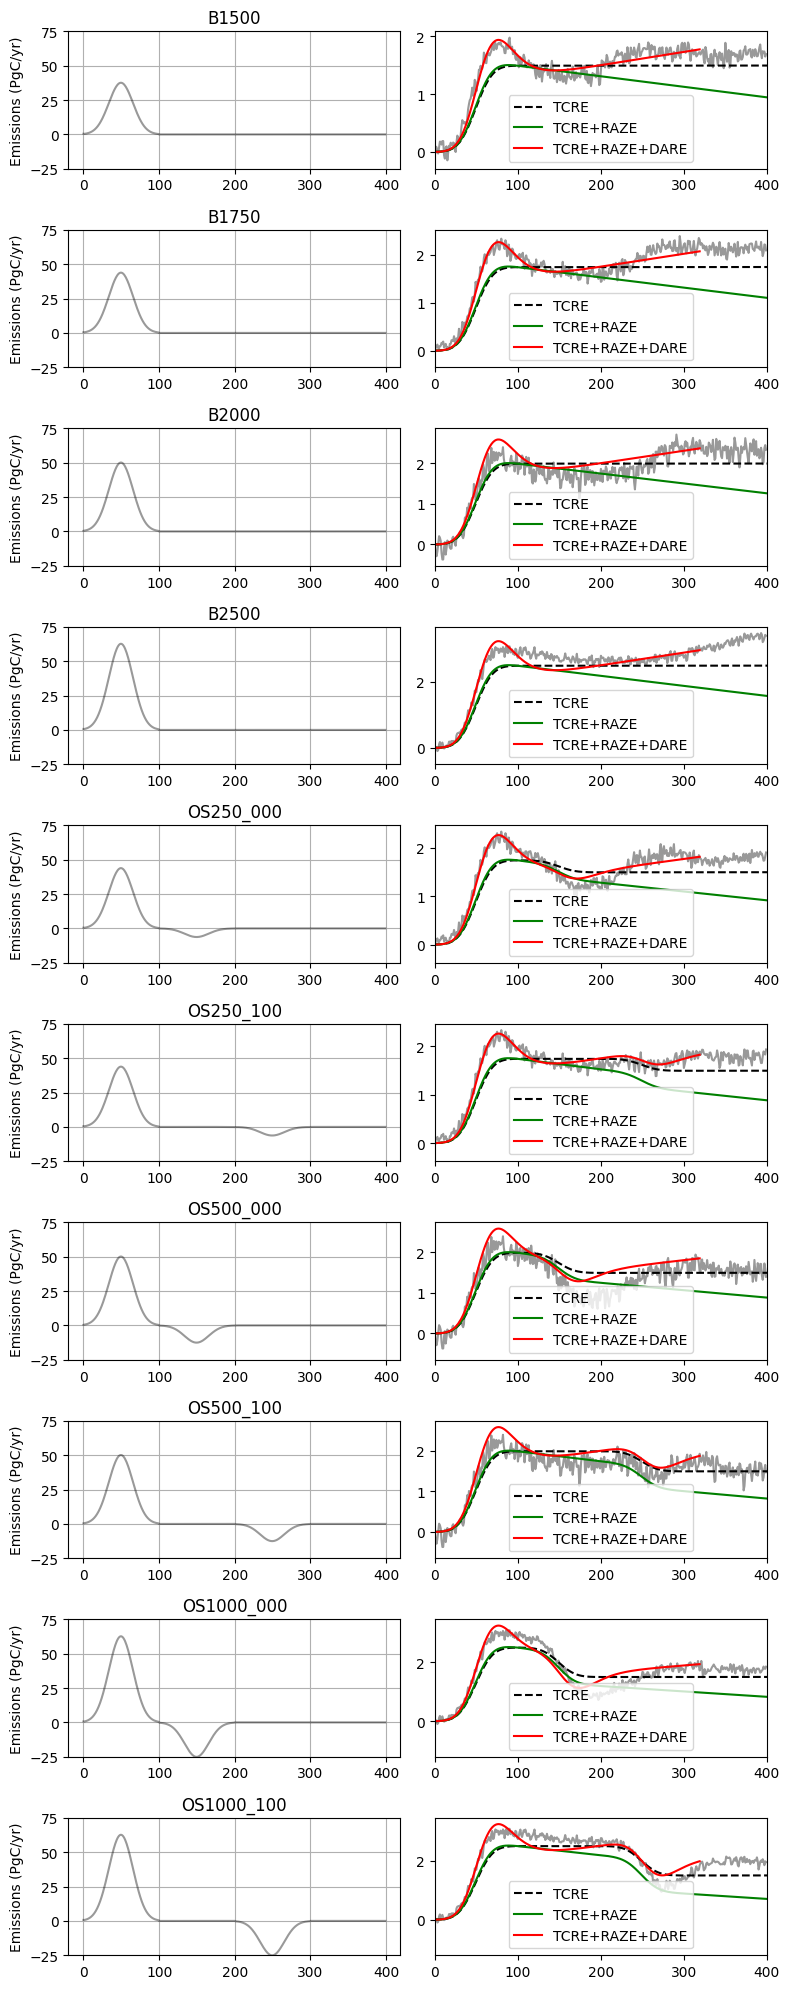

In [ ]:

fig, axs = plt.subplots(10, 2,figsize=[8,20])
for i,ex in enumerate(iexp):
    axs[i,0].plot(impose[ex]['co2em[PgC]'],'k',alpha=0.4)
    axs[i,1].plot(impose[ex]['T_ESM[K]'],'k',alpha=0.4)
    p1=axs[i,1].plot(signal.convolve(agtp_simp[:,4],impose[ex]['co2em[PgC]']),'k--',label='TCRE')
    p2=axs[i,1].plot(signal.convolve(agtp_corr2[:,4],impose[ex]['co2em[PgC]']),'g',label='TCRE+RAZE')

    p3=axs[i,1].plot(implsfun(opt_impose.x,tsamp,impose[ex]['co2em[PgC]'])[:l],'r',label='TCRE+RAZE+DARE')
    axs[i,1].set_xlim(0,400)
    axs[i,0].set_ylim(-25,75)
    axs[i,0].set_ylabel('Emissions (PgC/yr)')
    
    axs[i,0].grid()
    axs[i,0].set_title(ex)
    axs[i,1].legend()
plt.tight_layout()
    


#c-driven predictions


/usr/local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


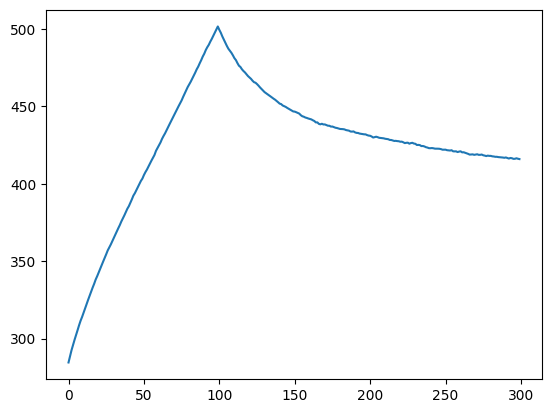

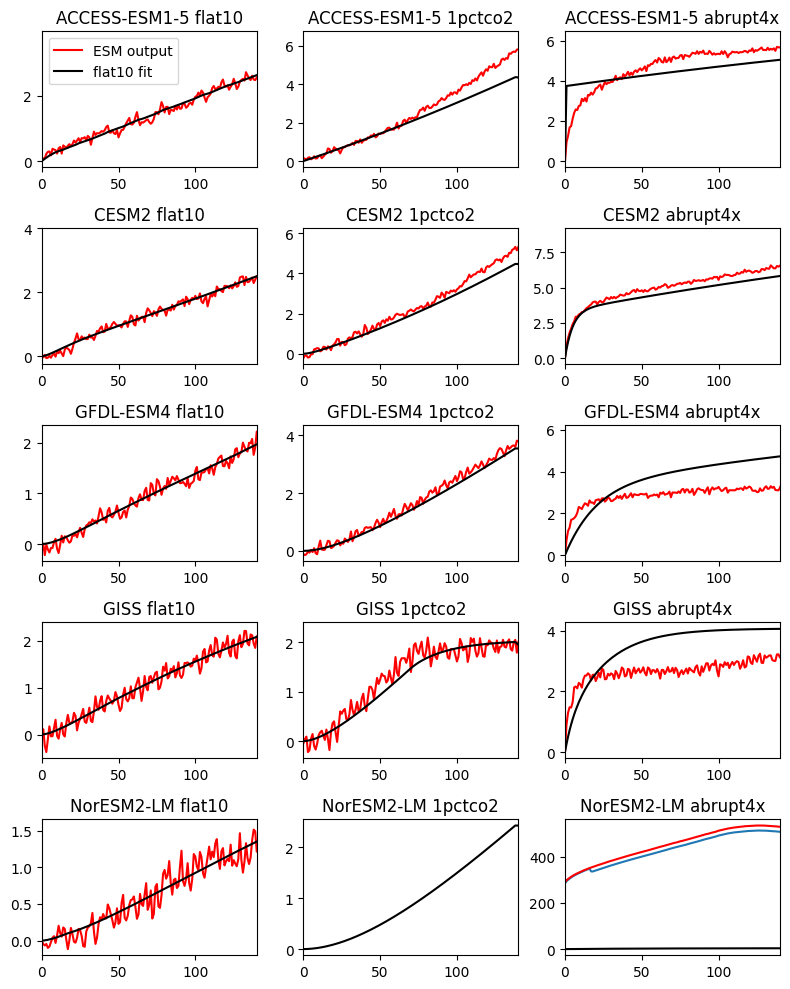

In [ ]:
import numpy as np
import scipy
import scipy.signal as signal

def sfun(x,t):
  out=x[0]*(1-np.exp(-t/x[1]))+x[2]*(1-np.exp(-t/x[3]))+x[4]*(1-np.exp(-t/x[5]))
  return out

def sffun(x,f):
  impls=signal.convolve(sfun(x,np.arange(0,len(f))),f)
  
  return impls

def sresidfun(x,trg,f):
  impls=sffun(x,f)
  out=np.sum((impls[:len(trg)]-trg)**2)
  return out


Ccn0=ed['CESM2']['flat10-zec'].co2
Tcn0=ed['CESM2']['flat10-zec'].tas-ed['CESM2']['flat10-zec'].tas[0]

F0=5.35*np.log(Ccn0[:]/Ccn0[0])
bnds = ((0., 10.), (.1, 10.),(0.,10.),(10.,100.),(0.,10.),(100.,1000.))
sopt=scipy.optimize.minimize(lambda x: sresidfun(x,Tcn0[:],np.diff(F0)), [.01,5,.01,50,.01,500],bounds=bnds,method='SLSQP')
plt.plot(Ccn0)
c6a4=xr.open_dataset('c_data/abrupt-4xCO2_gm.nc')
c61p=xr.open_dataset('c_data/1pctCO2_gm.nc')

c6mdls=pd.read_pickle('c_data/mdls (1).pkl', compression='infer')
mdls
c6map=['ACCESS-CM2','CESM2','GFDL-ESM4','GISS-E2-1-G','']

fig, axs = plt.subplots(5, 3,figsize=[8,10])

for i,m in enumerate(mdls):
    Ccn0=ed[m]['flat10'].co2
    Tcn0=ed[m]['flat10'].tas-ed[m]['flat10-zec'].tas[0]

    F0=5.35*np.log(Ccn0[:]/Ccn0[0]).values.ravel()
    bnds = ((0., 10.), (.002, 5.),(0.,10.),(5.,100.),(0.,10.),(100.,1000.))
    sopt=scipy.optimize.minimize(lambda x: sresidfun(x,Tcn0[:].values,np.diff(F0)), [.01,5,.01,50,.01,500],bounds=bnds,method='SLSQP')
    p1=axs[i,0].plot(Tcn0,'r',label='ESM output')
    p2=axs[i,0].plot(sffun(sopt.x,np.diff(F0)),'k',label='flat10 fit')
    
    if i==3:
        prd=sffun(sopt.x,np.diff(3.71*np.hstack((np.arange(0,70)/70,np.ones(70)))))
    else:
        prd=sffun(sopt.x,np.diff(3.71*np.arange(0,140)/70))
    try:
        sim=c61p['tas'][c6mdls.index(c6map[i]),:]
        offst=sim[:30].mean()-prd[:30].mean()
        axs[i,1].plot((sim-offst),'r')
        axs[i,2].plot((c6a4['tas'][c6mdls.index(c6map[i]),:]-c6a4['tas'][c6mdls.index(c6map[i]),0]),'r')

    except:
        0
    axs[i,1].plot(prd,'k')

    axs[i,2].plot(sfun(sopt.x,np.arange(0,300))*3.7*2,'k')
    axs[i,2].set_xlim([0,140])
    axs[i,1].set_xlim([0,140])
    axs[i,0].set_xlim([0,140])
    axs[i,0].set_title(m+' flat10')
    axs[i,1].set_title(m+' 1pctco2')
    axs[i,2].set_title(m+' abrupt4x')
plt.tight_layout()
axs[0,0].legend()
plt.plot(ed['NorESM2-LM']['flat10-cdr']['co2'])
plt.plot(280+np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)']-ed['NorESM2-LM']['flat10-cdr']['fgco2']-ed['NorESM2-LM']['flat10-cdr']['nbp'])/2.12,'r')
